## Selecting a Good Check Standard Measurement
1. Input A Raw Measurement File From MEASLP (Ascii converted form)
2. Calrep The Raw File to Find Uncertainties
3. Find a Results File And Compare (requires file with Device_Id to be in results folder)
4. Compare the Difference With The Calrep Uncertainties 
5. Compare the Standard Error

In [20]:
# Import required modules
import wx
from pyMez import *
# this is explicit imports incase they are turned off in pyMez.__init__
from pyMez.Code.Analysis.SParameter import *
from pyMez.Code.Analysis.Uncertainty import *

from pyMez.Code.DataHandlers.GraphModels import *
from pyMez.Code.DataHandlers.NISTModels import *




In [1]:
%prun from pyMeasure import *

Importing Code.Analysis.Fitting
Importing Code.Analysis.Interpolation
Importing Code.Analysis.NISTUncertainty
Importing Code.Analysis.SParameter
The module smithplot was not found,please put it on the python path
Importing Code.Analysis.Uncertainty
Importing Code.DataHandlers.GeneralModels
Importing Code.DataHandlers.GraphModels
Importing Code.DataHandlers.HTMLModels
Importing Code.DataHandlers.MUFModels
Importing Code.DataHandlers.NISTModels
Importing Code.DataHandlers.StatistiCALModels
Importing Code.DataHandlers.TouchstoneModels
The module smithplot was not found,please put it on the python path
Importing Code.DataHandlers.Translations
Importing Code.DataHandlers.XMLModels
Importing Code.DataHandlers.ZipModels
Importing Code.InstrumentControl.Experiments
Importing Code.InstrumentControl.Instruments
Importing Code.Utils.Names
 

In [2]:
RAW_CHECKSTANDARD_DIRECTORY=r'C:\Share\Ck_Std_raw_ascii'

In [9]:
print sparameter_power_type(r"S:\Sanders\CTN112.L27_012518")

OnePortRawModel


In [4]:
raw=OnePortRawModel(r"S:\Sanders\CTN112.L27_012518")

In [8]:
raw.get_unique_column_values("Connect")

[1, 2, 3]

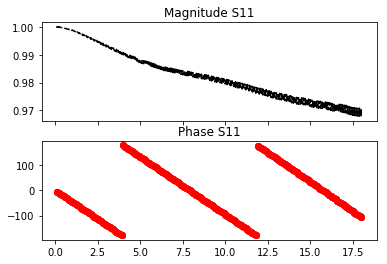

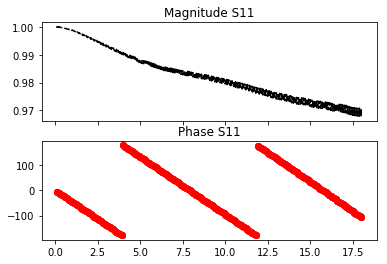

In [5]:
raw.show()

In [18]:
calrep_measurement=calrep(raw)

In [10]:
def get_path(wildcard='*.*'):
    """Creates a file dialog and returns the selected file"""
    app = wx.App(None)
    style = wx.FD_OPEN | wx.FD_FILE_MUST_EXIST
    dialog = wx.FileDialog(None, 'Open',defaultDir= RAW_CHECKSTANDARD_DIRECTORY,wildcard=wildcard, style=style)
    if dialog.ShowModal() == wx.ID_OK:
        path = dialog.GetPath()
    else:
        path = None
    dialog.Destroy()
    return path

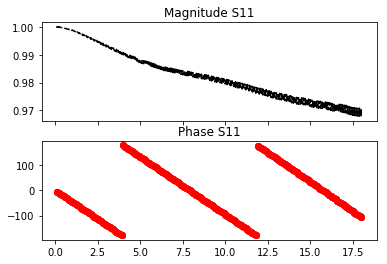

['edge_AsciiDataTable_DataFrame_000', 'edge_DataFrame_ExcelFile_000']
moving AsciiDataTable -> DataFrame
moving DataFrame -> ExcelFile
['edge_MatplotlibFigure_png_000', 'edge_png_base64_000', 'edge_base64_embeddedHTML_000']
moving MatplotlibFigure -> png
moving png -> base64
moving base64 -> embeddedHTML
equality_list is [True, False, True, False, False]
equality_list is [True, False, True, False, False]
['edge_ExcelFile_DataFrame_000', 'edge_DataFrame_AsciiDataTable_000', 'edge_AsciiDataTable_MatFile_000']
moving ExcelFile -> DataFrame
moving DataFrame -> AsciiDataTable
moving AsciiDataTable -> MatFile


In [11]:
%matplotlib inline
# get a raw measurement and plot it
new_report=HTMLBase()
new_report.add_body()
new_report.add_head()
image_graph=ImageGraph()
table_graph=TableGraph()
file_path=get_path()
raw_measurement_model=sparameter_power_type(file_path)
raw_measurement=globals()[raw_measurement_model](file_path)
fig=raw_measurement.show();
fig.suptitle("{0} : {1}".format(raw_measurement.metadata["Device_Id"],
                                raw_measurement.metadata["Device_Description"]))
fig.set_size_inches(8, 10)
table_graph.set_state("AsciiDataTable",raw_measurement)
table_graph.move_to_node("ExcelFile")
in_file=open(r'C:\Users\sandersa\PyCharmProjects\Jupyter-Notebooks\test.xlsx',"rb")
content_string=in_file.read()
image_graph.set_state("MatplotlibFigure",fig)
image_graph.move_to_node("embeddedHTML")
embedded=image_graph.data
new_report.append_to_body({"tag":"h1","text":" Report of Device {0}, {1}".format(raw_measurement.metadata["Device_Id"],
                                                                                raw_measurement.metadata["Measurement_Type"])})
new_report.append_to_body(embedded)
new_report.append_to_body({"tag":"br"})
new_report.append_to_body({"tag":"hr"})
new_report.append_to_body(String_to_DownloadLink(raw_measurement,text="Download Raw",suggested_name="raw.txt"))
new_report.append_to_body({"tag":"br"})
new_report.append_to_body({"tag":"hr"})
new_report.append_to_body(String_to_DownloadLink(content_string,text="Download Raw Excel",
                                                 suggested_name="raw.xlsx",
                                                 mime_type="application/vnd.openxmlformats-officedocument.spreadsheetml.sheet"))
table_graph.move_to_node("MatFile")
in_file=open(r'C:\Users\sandersa\PyCharmProjects\Jupyter-Notebooks\test.mat',"rb")
content_string=in_file.read()
new_report.append_to_body(String_to_DownloadLink(content_string,text="Download Raw Mat",
                                                 suggested_name="raw.mat",
                                                 mime_type="application/x-matlab-data"))

In [13]:
c2=calrep_measurement

In [23]:
diff=frequency_model_difference(c1,c2)

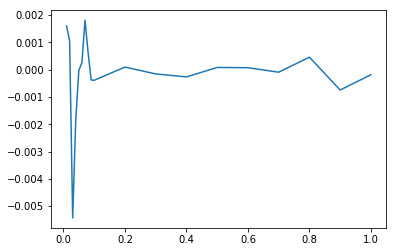

In [31]:
%matplotlib inline
plt.plot(diff["Frequency"],diff["magS22"])
plt.show()

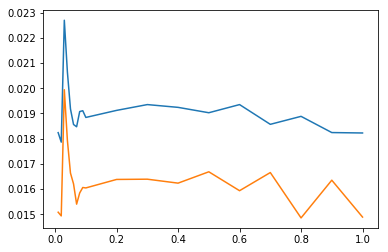

In [19]:

plt.plot(c1["Frequency"],c1["magS11"])
plt.plot(c2["Frequency"],c2["magS22"])
plt.show()

In [22]:
print c1

Calibration_Date = 7 Dec 2012
Calibration_Name = C121207.A5
Connector_Type_Calibration = Type N Fem
Connector_Type_Measurement = Type N
Device_Description = 50 dB CHECK STANDARD
Device_Id = CTN206
Measurement_Date = 16 Jan 2013
Measurement_Time = 15:26:15
Measurement_Type = 2-port
Nbs = 4
Number_Connects = 3
Number_Frequencies = 19
Number_Repeats = 1
Operator = br
Port_Used = 2
Program_Revision = 100202.1
Program_Used = MEAS95
Start_Frequency = 7
System_Id = System I
System_Letter = A
Frequency,magS11,uMbS11,uMaS11,uMdS11,uMgS11,argS11,uAbS11,uAaS11,uAdS11,uAgS11,magS21,uMbS21,uMaS21,uMdS21,uMgS21,argS21,uAbS21,uAaS21,uAdS21,uAgS21,magS22,uMbS22,uMaS22,uMdS22,uMgS22,argS22,uAbS22,uAaS22,uAdS22,uAgS22
0.01,0.0182366666667,0.00649289403454,0.000471476444751,1.24721912892e-05,0.0130200028475,1.02833333333,0.00631623318668,0.000471476409816,0.0147044966667,0.0320212000959,0.0031964530435,2.51454522705e-07,1.27775870021e-05,7.90412591287e-06,3.00536297587e-05,-0.406,0.03,0.10017,0.106386089

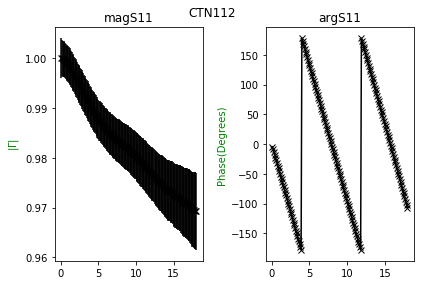

['edge_AsciiDataTable_DataFrame_000', 'edge_DataFrame_ExcelFile_000']
moving AsciiDataTable -> DataFrame
moving DataFrame -> ExcelFile
['edge_MatplotlibFigure_png_000', 'edge_png_base64_000', 'edge_base64_embeddedHTML_000']
moving MatplotlibFigure -> png
moving png -> base64
moving base64 -> embeddedHTML


In [12]:
# calrep the measurement and plot it
calrep_measurement=calrep(raw_measurement)
calrep_figure=plot_calrep(calrep_measurement);
calrep_figure.set_size_inches(8, 10)
table_graph.set_state("AsciiDataTable",calrep_measurement)
table_graph.move_to_node("ExcelFile")
in_file=open(r'C:\Users\sandersa\PyCharmProjects\Jupyter-Notebooks\test.xlsx',"rb")
content_string=in_file.read()
image_graph.set_state("MatplotlibFigure",calrep_figure)
image_graph.move_to_node("embeddedHTML")
embedded=image_graph.data
new_report.append_to_body({"tag":"h2","text":" Uncertainty Analysis of Device {0}, {1}".format(raw_measurement.metadata["Device_Id"],
                                                                                raw_measurement.metadata["Measurement_Type"])})
new_report.append_to_body(embedded)
new_report.append_to_body({"tag":"br"})
new_report.append_to_body({"tag":"hr"})
new_report.append_to_body(String_to_DownloadLink(calrep_measurement,text="Download Calrep",suggested_name="calrep.txt"))
new_report.append_to_body({"tag":"br"})
new_report.append_to_body({"tag":"hr"})
new_report.append_to_body(String_to_DownloadLink(content_string,text="Download Calrep Excel",
                                                 suggested_name="calrep.xlsx",
                                                 mime_type="application/vnd.openxmlformats-officedocument.spreadsheetml.sheet"))

In [13]:
new_report.show()

file://c:/users/sandersa/appdata/local/temp/1/tmpctyi8r.html


In [103]:
calrep_measurement.metadata["Measurement_Type"]

'1-port'

In [14]:
results_file=ResultFileModel(os.path.join(r'C:\Share\resfiles',
                                          calrep_measurement.metadata["Device_Id"]))

In [101]:

def plot_calrep_results_comparison(calrep_model, results_model, **options):
    """Plots a calrep file and a results file on the same axis. Input is a calrep table from the sparameter
    function calrep and a
    results file, with options. """
    defaults = {"display_legend": True,
                "save_plot": False,
                "directory": None,
                "specific_descriptor": "comparison_Plot",
                "general_descriptor": "Plot",
                "file_name": None,
                "labels": None,
                "error_suffix": 'g',
                "calrep_format": 'k-x',
                "results_format": 'r-x'}
    comparison_plot_options = {}
    for key, value in defaults.iteritems():
        comparison_plot_options[key] = value
    for key, value in options.iteritems():
        comparison_plot_options[key] = value
    # figure out the number of plots based on the measurement type
    measurement_type = calrep_model.metadata["Measurement_Type"]
    if re.search('1|one', measurement_type, re.IGNORECASE):
        number_plots = 2
        column_names = ['magS11', 'argS11']
    elif re.search('2|two', measurement_type, re.IGNORECASE):
        if re.search('NR', measurement_type, re.IGNORECASE):
            number_plots = 8
            column_names = ['magS11', 'argS11', 'magS12', 'argS12', 'magS21', 'argS21', 'magS22', 'argS22']
        else:
            number_plots = 6
            column_names = ['magS11', 'argS11', 'magS21', 'argS21', 'magS22', 'argS22']
    else:
        number_plots = 3
        column_names = ['magS11', 'argS11', 'Efficiency']
    # create the error column names
    error_columns = []
    for column in column_names[:]:
        error_column = column.replace("mag", "uM" + comparison_plot_options["error_suffix"])
        error_column = error_column.replace("arg", "uA" + comparison_plot_options["error_suffix"])
        error_column = error_column.replace("Efficiency", "uE" + comparison_plot_options["error_suffix"])
        error_columns.append(error_column)

    # We want plots that have frequency as the x-axis and y that has an error 
    calrep_x = calrep_model["Frequency"]
    results_x = results_model["Frequency"]
    number_rows = int(round(float(number_plots) / 2))
    fig, compare_axes = plt.subplots(nrows=number_rows, ncols=2, sharex='col', figsize=(8, 6), dpi=80)
    # each axis has an error column     
    for plot_index, ax in enumerate(compare_axes.flat[:]):
        calrep_y = np.array(calrep_model[column_names[plot_index]])
        results_y = np.array(results_model[column_names[plot_index]])
        error = np.array(calrep_model[error_columns[plot_index]])
        ax.plot(calrep_x, calrep_y, comparison_plot_options['calrep_format'],
                label='Calrep of {0}'.format(calrep_model.metadata["Device_Id"]))
        ax.fill_between(calrep_x, calrep_y - error, calrep_y + error, edgecolor=(0, .0, .0, .25),
                        facecolor=(.25, .25, .25, .1),
                        linewidth=1)
        ax.plot(results_x, results_y, comparison_plot_options['results_format'], label="Reference File")
        if comparison_plot_options["display_legend"]:
            ax.legend()

    # Dealing with the save option
    if comparison_plot_options["file_name"] is None:
        file_name = auto_name(specific_descriptor=comparison_plot_options["specific_descriptor"],
                              general_descriptor=comparison_plot_options["general_descriptor"],
                              directory=comparison_plot_options["directory"]
                              , extension='png', padding=3)
    else:
        file_name = comparison_plot_options["file_name"]
    if comparison_plot_options["save_plot"]:
        # print file_name
        plt.savefig(os.path.join(comparison_plot_options["directory"], file_name))
    else:
        plt.show()
    return fig

In [21]:
raw_measurement=raw

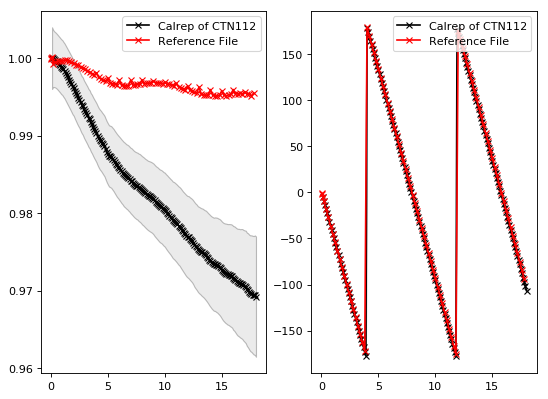

['edge_AsciiDataTable_DataFrame_000', 'edge_DataFrame_ExcelFile_000']
moving AsciiDataTable -> DataFrame
moving DataFrame -> ExcelFile
['edge_MatplotlibFigure_png_000', 'edge_png_base64_000', 'edge_base64_embeddedHTML_000']
moving MatplotlibFigure -> png
moving png -> base64
moving base64 -> embeddedHTML


In [15]:
calrep_results_figure=plot_calrep_results_comparison(calrep_measurement,results_file,
                               display_legend=True);
calrep_results_figure.set_size_inches(8, 10)
table_graph.set_state("AsciiDataTable",results_file)
table_graph.move_to_node("ExcelFile")
in_file=open(r'C:\Users\sandersa\PyCharmProjects\Jupyter-Notebooks\test.xlsx',"rb")
content_string=in_file.read()
image_graph.set_state("MatplotlibFigure",calrep_results_figure)
image_graph.move_to_node("embeddedHTML")
embedded=image_graph.data
new_report.append_to_body({"tag":"h2","text":" Comparison of {0}, {1}".format(raw_measurement.metadata["Device_Id"],
                                                                                raw_measurement.metadata["Measurement_Type"])})
new_report.append_to_body(embedded)
new_report.append_to_body({"tag":"br"})
new_report.append_to_body({"tag":"hr"})
new_report.append_to_body(String_to_DownloadLink(results_file,text="Download Results File",suggested_name="results.txt"))
new_report.append_to_body({"tag":"br"})
new_report.append_to_body({"tag":"hr"})
new_report.append_to_body(String_to_DownloadLink(content_string,text="Download Results Excel",
                                                 suggested_name="results.xlsx",
                                                 mime_type="application/vnd.openxmlformats-officedocument.spreadsheetml.sheet"))

#print calrep_measurement.metadata

In [28]:
def frequency_model_difference(model_1,model_2,**options):
    """Takes the difference of two models that both have frequency and a similar set of columns. Returns an object that is 
    a list of [[frequency,column_1,..column_n],...] where columns are the same in the models. If  a particular subset of 
    columns is desired use columns=["Frequency","magS11] models can be any subclass of AsciiDataTable, SNP, or 
    pandas.DataFrame, if a column is a non-numeric type it drops it. The frequency list should be unique 
    (no multiple frequencies) for at least one model"""
    # Set up defaults and pass options
    defaults={"columns":"all","interpolate":False,"average":True}
    difference_options={}
    for key,value in defaults.iteritems():
        difference_options[key]=value
    for key,value in options.iteritems():
        difference_options[key]=value
        
    # first check type, if it is a panadas data frame a little conversion is needed, else is for all other models
    if type(model_1) in [pandas.DataFrame]:
        model_1=DataFrame_to_AsciiDataTable(model_1)
    if type(model_2) in [pandas.DataFrame]:
        model_2=DataFrame_to_AsciiDataTable(model_2)
    # now start with a set of frequencies (unique values from both)
    frequency_set_1=set(model_1["Frequency"])
    frequency_set_2=set(model_2["Frequency"])
    model_2_frequency_selector=model_2.column_names.index('Frequency')
    column_names_set_1=set(model_1.column_names)
    column_names_set_2=set(model_2.column_names)
    

    # All points must be in the intersection to be used
    frequency_intersection=list(frequency_set_1.intersection(frequency_set_2))
    column_names_intersection=list(column_names_set_1.intersection(column_names_set_2))
    
    if not frequency_intersection:
        print("The models do not have any frequency points in common")
        return None
    new_column_names=["Frequency"]
    difference_data=[]
    for row_index,frequency in enumerate(model_1["Frequency"]):
        new_row=[frequency]
        if frequency in frequency_intersection:
            model_2_frequency_row=filter(lambda x: x[model_2_frequency_selector]==frequency,model_2.data)[0]
            #print("{0} is {1}".format("model_2_frequency_row",model_2_frequency_row))
            for column_index,column in enumerate(model_1.column_names):
                if column in column_names_intersection and column not in ["Frequency"]:
                    model_2_column_selector=model_2.column_names.index(column)
                    if re.search('int|float',
                                 model_1.options["column_types"][column_index],
                                 re.IGNORECASE) and re.search('int|float',
                                                              model_2.options["column_types"][model_2_column_selector],
                                                              re.IGNORECASE):
                        
                        new_row.append(model_1.data[row_index][column_index]-model_2_frequency_row[model_2_column_selector])
                        new_column_names.append(column)
                        #Print("New Column Names are {0}".format(new_column_names))
                    elif difference_options["columns"] in ["all"]:
                        new_row.append(model_1.data[row_index][column_index])
                        new_column_names.append(column)
            difference_data.append(new_row)
    difference_options["column_names"]=new_column_names
    #print("New Column Names are {0}".format(new_column_names))
    difference_options["data"]=difference_data      
    result=AsciiDataTable(None,**difference_options)
    return result

In [112]:

def plot_calrep_results_difference_comparison(calrep_model, results_model, **options):
    """Plots a calrep file and a results file on the same axis. Input is a calrep table from the sparameter
    function calrep and a
    results file, with options. """
    defaults = {"display_legend": False,
                "save_plot": False,
                "directory": None,
                "specific_descriptor": "comparison_Plot",
                "general_descriptor": "Plot",
                "file_name": None,
                "labels": None,
                "error_suffix": 'g',
                "calrep_format": 'r-x',
                "results_format": 'r-x',
                "debug":False,
                "title":'Calrep diiference of {0}'.format(calrep_model.metadata["Device_Id"])}
    comparison_plot_options = {}
    for key, value in defaults.iteritems():
        comparison_plot_options[key] = value
    for key, value in options.iteritems():
        comparison_plot_options[key] = value
    # figure out the number of plots based on the measurement type
    measurement_type = calrep_model.metadata["Measurement_Type"]
    if re.search('1|one', measurement_type, re.IGNORECASE):
        number_plots = 2
        column_names = ['magS11', 'argS11']
    elif re.search('2|two', measurement_type, re.IGNORECASE):
        if re.search('NR', measurement_type, re.IGNORECASE):
            number_plots = 8
            column_names = ['magS11', 'argS11', 'magS12', 'argS12', 'magS21', 'argS21', 'magS22', 'argS22']
        else:
            number_plots = 6
            column_names = ['magS11', 'argS11', 'magS21', 'argS21', 'magS22', 'argS22']
    else:
        number_plots = 3
        column_names = ['magS11', 'argS11', 'Efficiency']
    # create the error column names
    error_columns = []
    for column in column_names[:]:
        error_column = column.replace("mag", "uM" + comparison_plot_options["error_suffix"])
        error_column = error_column.replace("arg", "uA" + comparison_plot_options["error_suffix"])
        error_column = error_column.replace("Efficiency", "uE" + comparison_plot_options["error_suffix"])
        error_columns.append(error_column)
    difference_model=frequency_model_difference(calrep_model,results_model)
    if comparison_plot_options["debug"]:
        print("{0} is {1}".format("difference_model.column_names",difference_model.column_names))
    # We want plots that have frequency as the x-axis and y that has an error 
    difference_x=difference_model["Frequency"]
    calrep_x=calrep_model["Frequency"]
    number_rows = int(round(float(number_plots) / 2))
    fig, compare_axes = plt.subplots(nrows=number_rows, ncols=2, sharex='col', figsize=(8, 6), dpi=80)
    # each axis has an error column     
    for plot_index, ax in enumerate(compare_axes.flat[:]):

        difference_y=np.array(difference_model[column_names[plot_index]])
        error = np.array(calrep_model[error_columns[plot_index]])
        ax.plot(difference_x, difference_y, comparison_plot_options['calrep_format'],
                label='Calrep diiference of {0}'.format(calrep_model.metadata["Device_Id"]))
        ax.fill_between(calrep_x, - error,  error, edgecolor=(0, .0, .0, .25),
                        facecolor=(.25, .25, .25, .1),
                        linewidth=1)
        if comparison_plot_options["display_legend"]:
            ax.legend()
                                                          
    if comparison_plot_options["title"]:
            fig.suptitle(comparison_plot_options["title"])

    # Dealing with the save option
    if comparison_plot_options["file_name"] is None:
        file_name = auto_name(specific_descriptor=comparison_plot_options["specific_descriptor"],
                              general_descriptor=comparison_plot_options["general_descriptor"],
                              directory=comparison_plot_options["directory"]
                              , extension='png', padding=3)
    else:
        file_name = comparison_plot_options["file_name"]
    if comparison_plot_options["save_plot"]:
        # print file_name
        plt.savefig(os.path.join(comparison_plot_options["directory"], file_name))
    else:
        plt.show()
    return fig

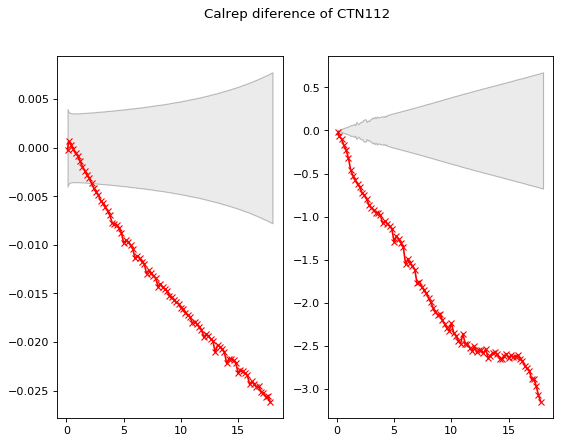

['edge_MatplotlibFigure_png_000', 'edge_png_base64_000', 'edge_base64_embeddedHTML_000']
moving MatplotlibFigure -> png
moving png -> base64
moving base64 -> embeddedHTML


In [16]:
calrep_difference_figure=plot_calrep_results_difference_comparison(calrep_measurement,
                                          results_file,error_suffix='g');
calrep_difference_figure.set_size_inches(8, 10)
image_graph.set_state("MatplotlibFigure",calrep_difference_figure)
image_graph.move_to_node("embeddedHTML")
embedded=image_graph.data
new_report.append_to_body({"tag":"h2","text":" Difference of {0}, {1} with total uncertainty".format(raw_measurement.metadata["Device_Id"],
                                                                                raw_measurement.metadata["Measurement_Type"])})
new_report.append_to_body(embedded)

In [13]:
from pyMeasure.Code.Analysis.Uncertainty import *

In [30]:
def return_calrep_value_column_names(calrep_model):
    """Returns the column names for values in a calrep model. For example if the 
    calrep model is a 1-port, then it returns ["magS11","argS11"] """
    measurement_type = calrep_model.metadata["Measurement_Type"]
    if re.search('1|one', measurement_type, re.IGNORECASE):
        column_names = ['magS11', 'argS11']
    elif re.search('2|two', measurement_type, re.IGNORECASE):
        if re.search('NR', measurement_type, re.IGNORECASE):
            column_names = ['magS11', 'argS11', 'magS12', 'argS12', 'magS21', 'argS21', 'magS22', 'argS22']
        else:
            column_names = ['magS11', 'argS11', 'magS21', 'argS21', 'magS22', 'argS22']
    else:
        column_names = ['magS11', 'argS11', 'Efficiency']
    return column_names

def return_calrep_error_column_names(calrep_model_value_columns,error_suffix='g'):
    """Returns the column names for errors in a calrep model. For example if the 
    calrep model value column names are ["magS11","argS11"], then it returns ["uMgS11","uAgS11"] """
    error_columns = []
    for column in column_names[:]:
        error_column = column.replace("mag", "uM" + error_suffix)
        error_column = error_column.replace("arg", "uA" + error_suffix)
        error_column = error_column.replace("Efficiency", "uE" + error_suffix)
        error_columns.append(error_column)
    return error_columns

In [18]:
column_names=return_calrep_value_column_names(calrep_measurement)
error_column_names=return_calrep_error_column_names(column_names)
print error_column_names

['uMgS11', 'uAgS11']


In [19]:
column_names=return_calrep_value_column_names(calrep_measurement)
error_column_names=return_calrep_error_column_names(column_names)   
standard_error=standard_error_data_table(calrep_measurement,results_file,
                                         table_1_uncertainty_column_names=error_column_names,
                                        value_column_names=column_names,expansion_factor=1)
stadard_error_figure=standard_error.show();
good=standard_error.get_conformation_dictionary().values().count(True)/len(standard_error.column_names)
stadard_error_figure.set_size_inches(8, 10)
table_graph.set_state("AsciiDataTable",standard_error)
table_graph.move_to_node("ExcelFile")
in_file=open(r'C:\Users\sandersa\PyCharmProjects\Jupyter-Notebooks\test.xlsx',"rb")
content_string=in_file.read()
image_graph.set_state("MatplotlibFigure",stadard_error_figure)
image_graph.move_to_node("embeddedHTML")
embedded=image_graph.data
new_report.append_to_body({"tag":"h2","text":" Standard Error of {0}, {1} with reference file".format(raw_measurement.metadata["Device_Id"],
                                                                                raw_measurement.metadata["Measurement_Type"])})
new_report.append_to_body(embedded)
new_report.append_to_body({"tag":"br"})
new_report.append_to_body({"tag":"hr"})
new_report.append_to_body(String_to_DownloadLink(standard_error,
                                                 text="Download Standard Error File",
                                                 suggested_name="StandardError.txt"))
new_report.append_to_body({"tag":"br"})
new_report.append_to_body({"tag":"hr"})
new_report.append_to_body(String_to_DownloadLink(content_string,text="Download Standard Error Excel",
                                                 suggested_name="StandardError.xlsx",
                                                 mime_type="application/vnd.openxmlformats-officedocument.spreadsheetml.sheet"))


NameError: name 'standard_error_data_table' is not defined

In [117]:
new_report.show()

file://c:/users/sandersa/appdata/local/temp/1/tmpq65kgz.html


In [18]:
?standard_error_data_table

In [19]:
help(standard_error_data_table)

Help on function standard_error_data_table in module pyMeasure.Code.Analysis.Uncertainty:

standard_error_data_table(table_1, table_2, **options)
    standard error data table takes two tables and creates a table that is the standard error of the two tables,
    at least one table must have uncertainties associated with it. The input tables are assumed to have data
    in the form [[x, y1, y2,...]..] Uncertainties can be specified as a column name in the respective
    table, fractional, constant, or a function of the values. The returned table is an object
    of the class StandardErrorModel(AsciiDataTable) that has data in the form
    [[independent_varaible,SEValue1,SEValue2...]...] where column names are formed by
    appending SE to the value column names. To plot the table use result.show()



In [30]:
fig.show()

In [4]:
new_report=HTMLBase()

In [18]:
new_report.document

In [6]:
print new_report

<!DOCTYPE html PUBLIC "-//W3C//DTD HTML 4.0 Transitional//EN" "http://www.w3.org/TR/REC-html40/loose.dtd">
<html><head></head><body></body></html>


In [5]:
new_report.add_body()
new_report.add_head()

In [20]:
new_log=XMLLog()

In [21]:
new_log.add_entry("I had a hard time")

In [22]:
print new_log

<?xml version="1.0" ?>
<?xml-stylesheet type="text/xsl" href="../XSL/DEFAULT_LOG_STYLE.xsl"?>
<Log>
	<Entry Date="2017-03-17T19:00:18.677000" Index="1">I had a hard time</Entry>
</Log>



In [13]:
new_body=make_html_element(tag="body",content="")

In [14]:
new_report.root.append(new_body)

In [4]:
print new_report

<!DOCTYPE html PUBLIC "-//W3C//DTD HTML 4.0 Transitional//EN" "http://www.w3.org/TR/REC-html40/loose.dtd">
<html><body></body></html>


In [10]:
dir(new_report.root)

['__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__doc__',
 '__format__',
 '__getattribute__',
 '__getitem__',
 '__hash__',
 '__init__',
 '__iter__',
 '__len__',
 '__module__',
 '__new__',
 '__nonzero__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_init',
 'addnext',
 'addprevious',
 'append',
 'attrib',
 'base',
 'base_url',
 'body',
 'classes',
 'clear',
 'cssselect',
 'drop_tag',
 'drop_tree',
 'extend',
 'find',
 'find_class',
 'find_rel_links',
 'findall',
 'findtext',
 'forms',
 'get',
 'get_element_by_id',
 'getchildren',
 'getiterator',
 'getnext',
 'getparent',
 'getprevious',
 'getroottree',
 'head',
 'index',
 'insert',
 'items',
 'iter',
 'iterancestors',
 'iterchildren',
 'iterdescendants',
 'iterfind',
 'iterlinks',
 'itersiblings',
 'itertext',
 'keys',
 'label',
 'make_links_absolute',
 'makeelem

In [33]:
new_report.root.getchildren()

[<Element body at 0x1bece598>]

In [37]:
type(new_body)==lxml.html.HtmlElement


True

In [9]:
"head" in dir(new_report.root)

True

In [20]:
new_report.root.getchildren()[0].tag

'body'

In [19]:
image_graph=ImageGraph()

In [36]:
image_graph.set_state("MatplotlibFigure",fig)

In [18]:
image_graph.move_to_node("embeddedHTML")

['edge_MatplotlibFigure_png_000', 'edge_png_base64_000', 'edge_base64_embeddedHTML_000']
moving MatplotlibFigure -> png
moving png -> base64
moving base64 -> embeddedHTML


In [19]:
new_report.append_to_body(image_graph.data)

In [24]:
new_report.to_pdf("test_of_image.pdf")

Loading pages (1/6)
Counting pages (2/6)                                               
Resolving links (4/6)                                                       
Loading headers and footers (5/6)                                           
Printing pages (6/6)
Done                                                                      


'test_of_image.pdf'

In [20]:
new_report.append_to_body("<h3>Figure 1. Raw Input</h3>")

In [23]:
image_graph.set_state("MatplotlibFigure",calrep_figure)
image_graph.move_to_node("embeddedHTML")
new_report.append_to_body(image_graph.data)
new_report.append_to_body("<h3>Figure 2. Calrep Input</h3>")

['edge_MatplotlibFigure_png_000', 'edge_png_base64_000', 'edge_base64_embeddedHTML_000']
moving MatplotlibFigure -> png
moving png -> base64
moving base64 -> embeddedHTML


In [34]:
new_report.root.body

<Element body at 0x19ad6bd8>

<!DOCTYPE html PUBLIC "-//W3C//DTD HTML 4.0 Transitional//EN" "http://www.w3.org/TR/REC-html40/loose.dtd">
<html><body><h3>Figure 1. Raw Input</h3><h3>Figure 1. Raw Input</h3><h3>Figure 2. Calrep Input</h3></body></html>

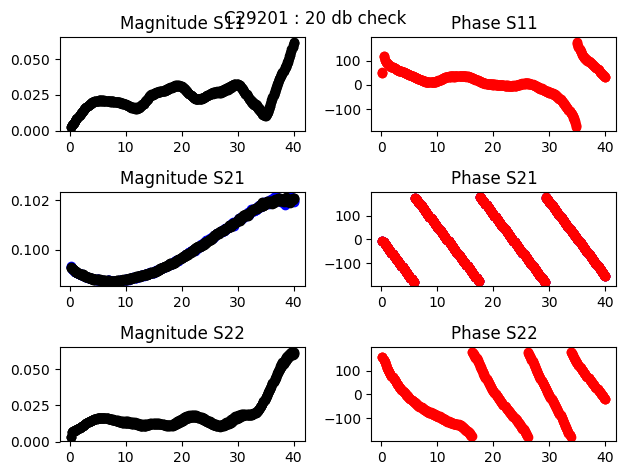
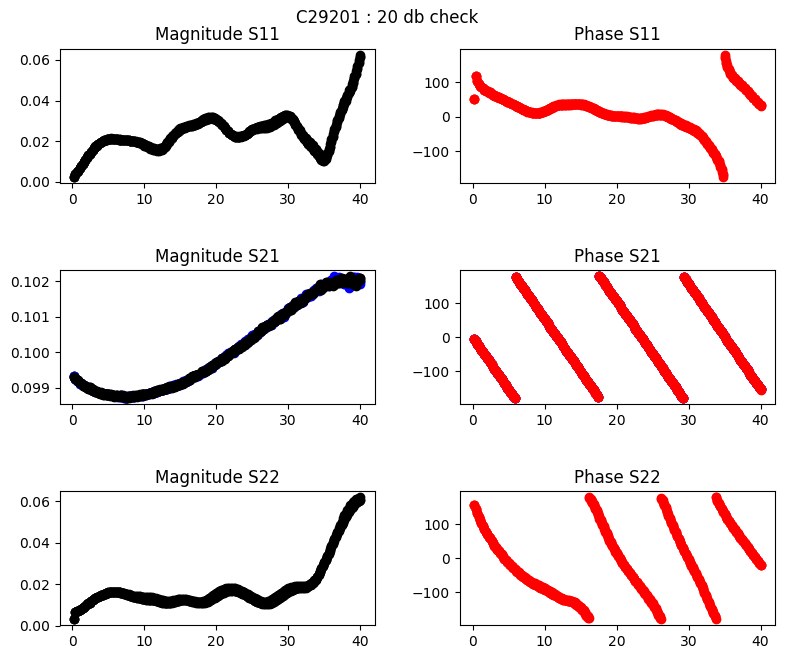
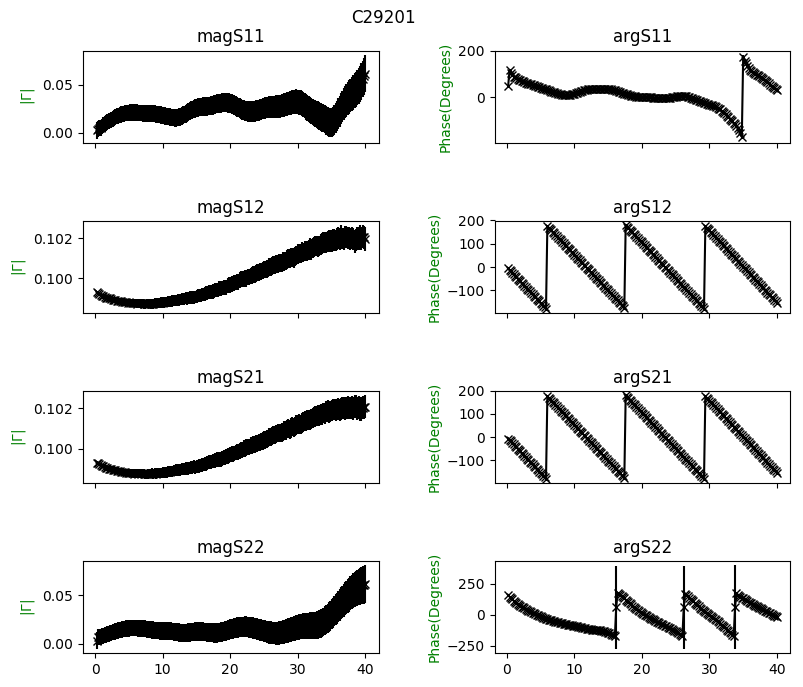

In [28]:
print new_report

In [9]:
new_report.root.getchildren()

[<Element head at 0x1340d318>, <Element body at 0x1340d3b8>]

In [7]:
new_report.append_to_head({"tag":"meta","name":"description","content":"calrep report"})

In [10]:
print new_report

<!DOCTYPE html PUBLIC "-//W3C//DTD HTML 4.0 Transitional//EN" "http://www.w3.org/TR/REC-html40/loose.dtd">
<html><head><meta content="calrep report" name="description"></head><body></body></html>


In [14]:
x=make_xml_element(**{"tag":"meta","name":"description","content":"calrep report"})

In [2]:
e1=make_html_element(**{"tag":"meta","name":"description","content":"calrep report"})
e2=make_html_element(**{"tag":"meta","name":"description","content":"calrep report"})
e1==e2

False

In [15]:
lxml.etree.tostring(x)

'<meta name="description">calrep report</meta>'

In [16]:
kids=new_report.root.head.getchildren()

In [18]:
kids[0].__copy__()

<Element meta at 0x1372bdb8>

In [41]:
image_graph.move_to_node("base64")
base_64=image_graph.data
link="<a href='data:image/png;base64,{0}' download = 'test.png'>Download Image</a>\n".format(base_64)
new_report.append_to_body(link)

['edge_base64_png_000', 'edge_png_base64_000']
moving base64 -> png
moving png -> base64


In [52]:
new_report.to_pdf("test_link.pdf")

Loading pages (1/6)
Counting pages (2/6)                                               
Resolving links (4/6)                                                       
Loading headers and footers (5/6)                                           
Printing pages (6/6)
QIODevice::write: Called with maxSize < 0
QIODevice::write: Called with maxSize < 0
QIODevice::write: Called with maxSize < 0
Done                                                                      


'test_link.pdf'

In [40]:
base_64

In [44]:
raw_measurement.metadata

{'Calibration_Date': '',
 'Calibration_Name': '',
 'Connector_Type_Calibration': '',
 'Connector_Type_Measurement': '3.5',
 'Device_Description': 'HP MODEL 8478B CHECKSTD',
 'Device_Id': 'C35P02',
 'Measurement_Date': '8 Apr 2004',
 'Measurement_Time': '11:57:50',
 'Measurement_Type': '1-port',
 'Nbs': '1',
 'Number_Connects': '3',
 'Number_Frequencies': '166',
 'Number_Repeats': '1',
 'Operator': 'dl/mp',
 'Port_Used': '1',
 'Program_Revision': '981016.1',
 'Program_Used': '8536D',
 'Start_Frequency': '7',
 'System_Id': 'HP8510',
 'System_Letter': 'L'}

In [45]:
import base64

In [46]:
b64=base64.encodestring(str(raw_measurement))

In [50]:
link="<a href='data:text/plain;base64,{0}' download = 'test.txt'>Download File</a>\n".format(b64)
new_report.append_to_body(link)
new_report.show()

file://c:/users/sandersa/appdata/local/temp/1/tmpm3f2ro.html


In [48]:
new_report.append_to_body({"tag":"br"})

In [49]:
new_report.append_to_body({"tag":"hr"})

In [6]:
def String_to_DownloadLink(string,**options):
    """Converts a string to a download link"""
    defaults={"suggested_name":"test.txt",
              "mime_type":"text/plain",
              "text":"Download File"}
    link_options={}
    for key,value in defaults.iteritems():
        link_options[key]=value
    for key,value in options.iteritems():
        link_options[key]=value
    if type(string) not in StringTypes:
        string=str(string)
    base_64=base64.encodestring(string)
    out_text="<a href='data:{0};base64,{1}' download = '{2}'>{3}</a>".format(link_options["mime_type"],
                                                                                    base_64,
                                                                                    link_options["suggested_name"],
                                                                                    link_options["text"])
    return out_text


    

In [53]:
def DownloadLink_to_String(download_link):
    """Given a download link of the form <a href='data:mime_type;base64,encoded_file' download='file_name'>text</a>
    returns a unencoded text string"""
    encoded_pattern="base64,(?P<encoded_text>[\w|\W]+)\'"
   
    if re.search(encoded_pattern,download_link):
        encoded_data=re.search(encoded_pattern,download_link).groupdict()["encoded_text"]
        decoded_data=base64.decodestring(encoded_data)
        return decoded_data
    else:
        print("Could Not Decode Link")
        return None

In [82]:
test="       test string h   "
dl=String_to_DownloadLink(test)
print dl

st=DownloadLink_to_String(dl)
print st
st==test


<a href='data:text/plain;base64,ICAgICAgIHRlc3Qgc3RyaW5nIGggICA=
' download = 'test.txt'>Download File</a>
       test string h   


True

In [63]:
match=re.search('\,(?P<item>[\w|\W]+)','a test,string ==')
print match.groupdict()["item"]

string ==


In [41]:
print match

None


In [59]:
print dl

<a href='data:text/plain;base64,dGVzdCBzdHJpbmc=
' download = 'test.txt'>Download File</a>


In [62]:
re.escape("<a href='data:(\.)+;base64,(?P<encoded_text>\.+)' download = '(\.)+'>(\.)+</a>")

"\\<a\\ href\\=\\'data\\:\\(\\\\\\.\\)\\+\\;base64\\,\\(\\?P\\<encoded\\_text\\>\\\\\\.\\+\\)\\'\\ download\\ \\=\\ \\'\\(\\\\\\.\\)\\+\\'\\>\\(\\\\\\.\\)\\+\\<\\/a\\>"

In [73]:
image_graph.set_state("MatplotlibFigure",calrep_figure)
image_graph.move_to_node("embeddedHTML")
new_report.append_to_body(image_graph.data)
new_report.append_to_body({"tag":"br"})
new_report.append_to_body({"tag":"hr"})
new_report.append_to_body(String_to_DownloadLink(calrep_measurement))
new_report.show()

['edge_MatplotlibFigure_png_000', 'edge_png_base64_000', 'edge_base64_embeddedHTML_000']
moving MatplotlibFigure -> png
moving png -> base64
moving base64 -> embeddedHTML
file://c:/users/sandersa/appdata/local/temp/1/tmp7bu8cb.html


In [121]:
new_report.show()

file://c:/users/sandersa/appdata/local/temp/1/tmpbrqhu0.html


In [138]:
new_svg=make_html_element(tag="svg",width="400",height="400",**{"xmlns:xlink":"http://www.w3.org/1999/xlink"})

In [123]:
print new_svg

<Element svg at 0x1bf84958>


In [170]:
anchor_link={"tag":"a","xlink:href":"http://www.example.com"}
tag_dict={"tag":"rect","x":"10","y":"10","width":"100","height":"100",
          "style":"fill:white;stroke:black;stroke-width:5;opacity:0.95"}
new_anchor=make_html_element(**anchor_link)
new_rect=make_html_element(**tag_dict)

In [140]:
new_anchor.append(new_rect)
new_svg.append(new_anchor)

In [141]:
new_report.append_to_body(new_svg)

In [21]:
new_report.show()

file://c:/users/sandersa/appdata/local/temp/1/tmpxclbsw.html


In [128]:
print new_svg

<Element svg at 0x1bf84958>


In [158]:
def String_to_SVGAnchorLinkElement(string,**options):
    """Converts a string to a DataURI"""
    defaults={"suggested_name":"test.txt",
              "mime_type":"text/plain"}
    link_options={}
    for key,value in defaults.iteritems():
        link_options[key]=value
    for key,value in options.iteritems():
        link_options[key]=value
    if type(string) not in StringTypes:
        string=str(string)
    base_64=base64.encodestring(string)
    data_uri="data:{0};base64,{1}".format(link_options["mime_type"],base_64)
    anchor_dictionary={"tag":"a","xlink:href":data_uri,"xlink:download":link_options["suggested_name"]}
    out_element=make_html_element(**anchor_dictionary)
    return out_element

In [165]:
new_anchor=String_to_SVGAnchorLinkElement(calrep_measurement,suggested_name="calrep.txt")

In [166]:
new_anchor.append(new_rect)

In [167]:
new_svg.append(new_anchor)

In [168]:
new_report.append_to_body(new_svg)

In [176]:
new_report.show()

file://c:/users/sandersa/appdata/local/temp/1/tmpmhtk6g.html


In [175]:
new_report.append_to_head({"tag":"style","text":"rect:hover {stroke-wdith:10}"})

In [121]:
# Data sources, to be replaced as project_files in Django
TWO_PORT_NR_CHKSTD_CSV=r"C:\Share\Converted_Check_Standard\Two_Port_NR_Check_Standard.csv"
COMBINED_ONE_PORT_CHKSTD_CSV=r"C:\Share\Converted_Check_Standard\Combined_One_Port_Check_Standard.csv"
COMBINED_TWO_PORT_CHKSTD_CSV=r"C:\Share\Converted_Check_Standard\Combined_Two_Port_Check_Standard.csv"
COMBINED_POWER_CHKSTD_CSV=r"C:\Share\Converted_Check_Standard\Combined_Power_Check_Standard.csv"
ONE_PORT_CALREP_CSV=r"C:\Share\Converted_DUT\One_Port_DUT.csv"
TWO_PORT_CALREP_CSV=r"C:\Share\Converted_DUT\Two_Port_DUT.csv"
POWER_3TERM_CALREP_CSV=r"C:\Share\Converted_DUT\Power_3Term_DUT.csv"
POWER_4TERM_CALREP_CSV=r"C:\Share\Converted_DUT\Power_4Term_DUT.csv"

In [25]:
one_port_dtype={'Frequency':'float',
 'Direction':'str',
 'Connect':'str',
 'System_Id':'str',
 'System_Letter':'str',
 'Connector_Type_Calibration':'str',
 'Connector_Type_Measurement':'str',
 'Measurement_Type':'str',
 'Measurement_Date':'str',
 'Measurement_Time':'str',
 'Program_Used':'str',
 'Program_Revision':'str',
 'Operator':'str',
 'Calibration_Name':'str',
 'Calibration_Date':'str',
 'Port_Used':'int',
 'Number_Connects':'str',
 'Number_Repeats':'str',
 'Nbs':'str',
 'Number_Frequencies':'str',
 'Start_Frequency':'float',
 'Device_Description':'str',
 'Device_Id':'str',
 'Measurement_Timestamp':'str',
}
if COMBINE_S11_S22:
    one_port_dtype["arg"]='float'
    one_port_dtype["mag"]='float'
else:
    one_port_dtype["argS11"]='float'
    one_port_dtype["magS11"]='float'
    one_port_dtype["argS22"]='float'
    one_port_dtype["magS22"]='float'
history_dict={'1-port':pandas.read_csv(COMBINED_ONE_PORT_CHKSTD_CSV,dtype=one_port_dtype),
         '2-port':pandas.read_csv(COMBINED_TWO_PORT_CHKSTD_CSV),
         '2-portNR':pandas.read_csv(TWO_PORT_NR_CHKSTD_CSV),'power':pandas.read_csv(COMBINED_POWER_CHKSTD_CSV)}

C:\ProgramData\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (10,11,12,16,18,19,20,27) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\ProgramData\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\ProgramData\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (8,9,14,16,17,25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


1-port


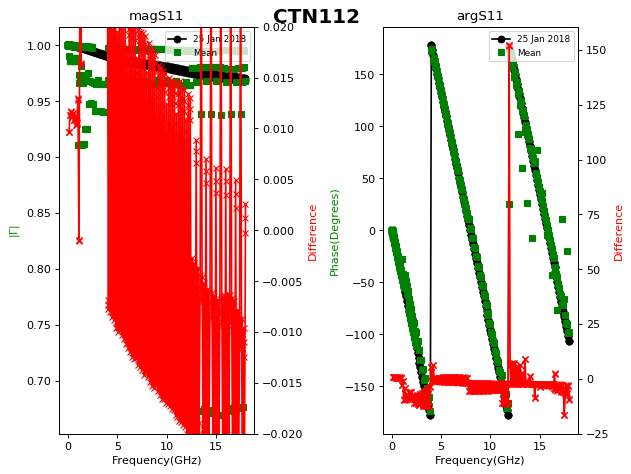

It took 7.936 seconds to process


In [28]:
#input_file=r"C:\Share\Ck_Std_raw_ascii\C07207.D1_030298"
input_file=r"C:\Share\Ck_Std_raw_ascii\C07207.D9_042500"
#input_file=r"C:\Share\Ck_Std_raw_ascii\C07208.A10_081507"
#input_file=r"C:\Share\Ck_Std_raw_ascii\CTNP20.R1_032310"
#input_file=r"C:\Share\Ck_Std_raw_ascii\CN49.K2_050608"
#input_file=r"C:\Share\Ck_Std_raw_ascii\C22P13.H4_043015"
#input_file=r"C:\Share\Ck_Std_raw_ascii\C24N07.L1_070998"
#input_file=r"C:\Share\Ck_Std_raw_ascii\CTN208.A1_011613"

start_time=datetime.datetime.now()
# file_model=sparameter_power_type(input_file)
# model=globals()[file_model]
table=raw
#print table
#table.metadata["System_Id"]
options={"Device_Id":table.metadata["Device_Id"], "System_Id":table.metadata["System_Id"],"Measurement_Timestamp":None, 
              "Connector_Type_Measurement":table.metadata["Connector_Type_Measurement"],
             "Measurement_Date":None,"Measurement_Time":None}
if re.search('2-port',table.metadata["Measurement_Type"],re.IGNORECASE) and not re.search('2-portNR',table.metadata["Measurement_Type"],re.IGNORECASE):
    history_key='2-port'
    options["column_names"]=['Frequency','magS11','argS11','magS21','argS21','magS22','argS22']
elif re.search('2-portNR',table.metadata["Measurement_Type"],re.IGNORECASE):
    history_key='2-portNR'
    options["column_names"]=['Frequency','magS11','argS11','magS12','argS12','magS21','argS21','magS22','argS22']
elif re.search('1-port',table.metadata["Measurement_Type"],re.IGNORECASE):
    history_key='1-port'
    if COMBINE_S11_S22:
        options["column_names"]=['Frequency','magS11','argS11']
    else:    
        options["column_names"]=['Frequency','magS11','argS11','magS22','argS22']
elif re.search('Dry Cal|Thermistor|power',table.metadata["Measurement_Type"],re.IGNORECASE):
    history_key='power'
    options["column_names"]=['Frequency','magS11','argS11','Efficiency','Calibration_Factor']
#print history[history_key][:5]
print history_key
mean_frame=mean_from_history(history_dict[history_key].copy(),**options)
#print mean_frame
difference_frame=raw_difference_frame(table,mean_frame)
#print difference_frame
raw_comparison_plot_with_residuals(table,mean_frame,difference_frame)
stop_time=datetime.datetime.now()
diff=stop_time-start_time
print("It took {0} seconds to process".format(diff.total_seconds()))

In [29]:
history=history_dict[history_key]

In [34]:
device_history=history[history["Device_Id"]==raw.metadata["Device_Id"]]

In [35]:
dates=device_history["Measurement_Date"].unique()

In [41]:
len(dates)

203

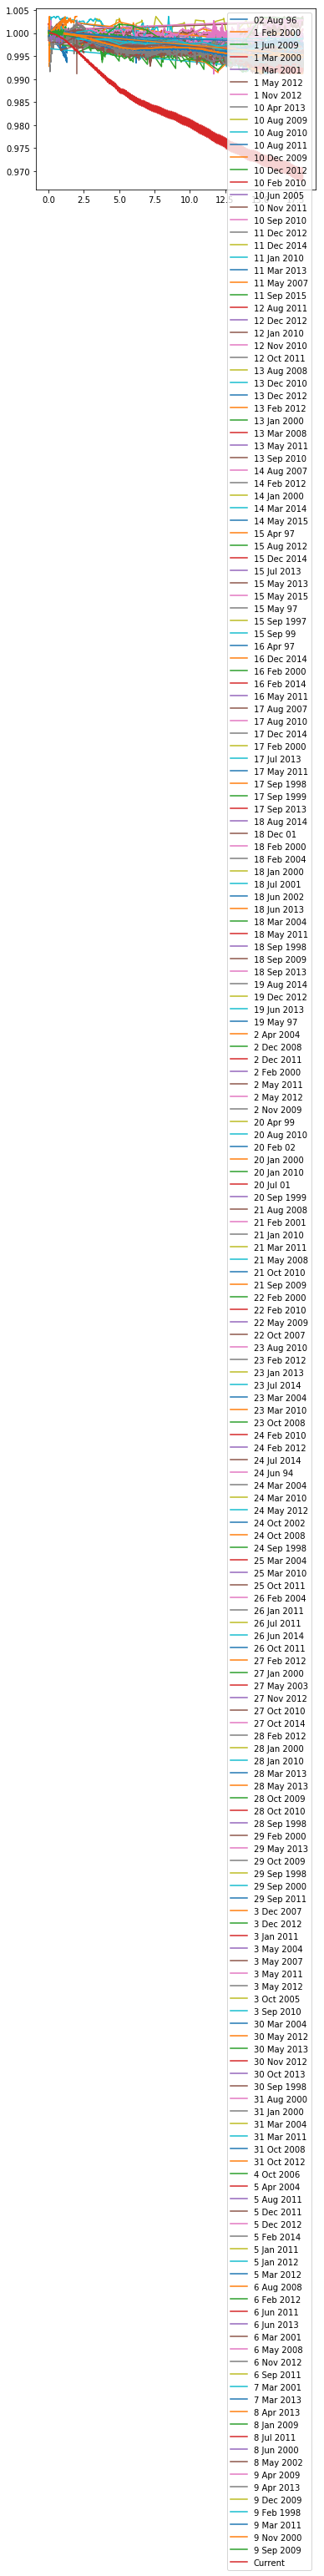

In [99]:
mean=np.mean(device_history["magS11"])
std=np.std(device_history["magS11"])
device_history=device_history[(device_history["magS11"]>(mean-3*std))]
device_history=device_history[(device_history["magS11"]<(mean+3*std))]
for date in sorted(dates)[:]:
    date_frame=device_history[device_history["Measurement_Date"]==date]
    plt.plot(date_frame["Frequency"],date_frame["magS11"],label=date)
plt.plot(raw["Frequency"],raw["magS11"],label="Current")
#plt.ylim([.97,1.02])
plt.legend()
plt.show()

In [50]:
np.std(device_history["magS11"])

0.06254969062782462

In [52]:
np.mean(device_history["magS11"])

0.9931583752291472

In [103]:
mean_frame_device=mean_from_history(device_history,**{"column_names":['Frequency','magS11','argS11']})
median_frame_device=mean_from_history(device_history,**{"column_names":['Frequency','magS11','argS11']})

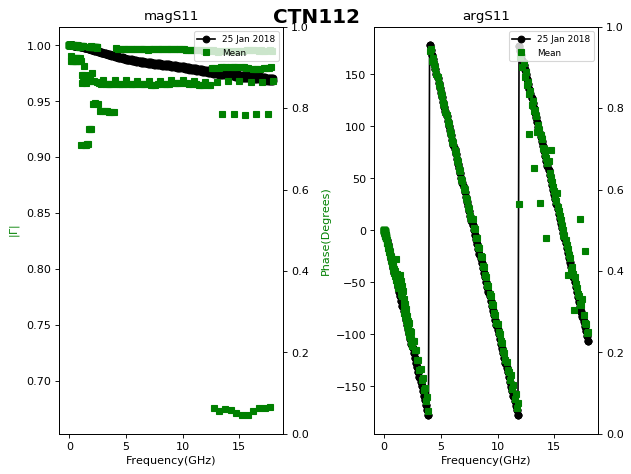

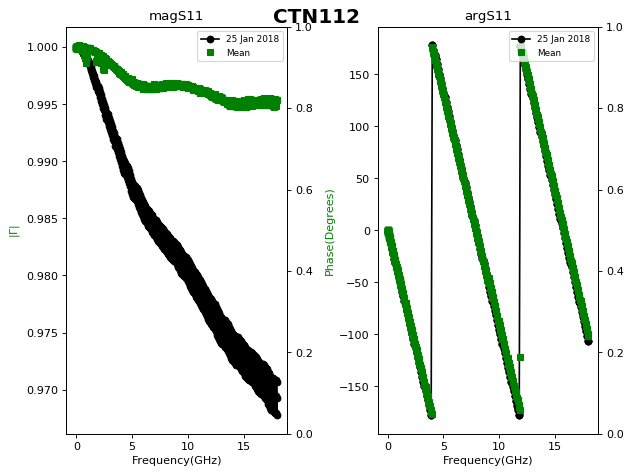

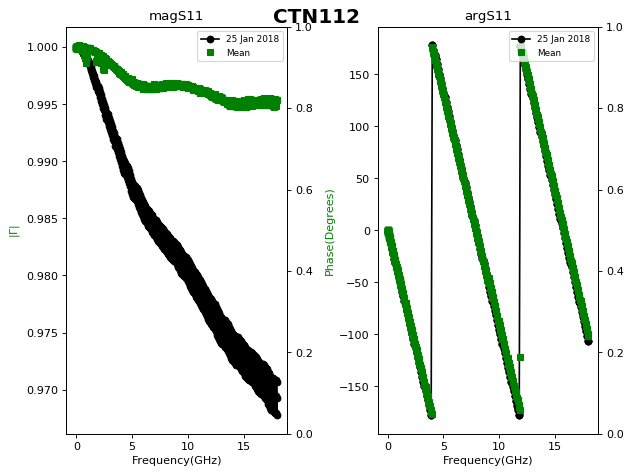

In [104]:
raw_comparison_plot_with_residuals(table,mean_frame,difference_frame,display_difference=False);
raw_comparison_plot_with_residuals(table,mean_frame_device,difference_frame,display_difference=False);
raw_comparison_plot_with_residuals(table,median_frame_device,difference_frame,display_difference=False);

In [110]:
device_history

Frequency Direction Connect   magS11  argS11 System_Id System_Letter  \
1210259       0.01         1       1  1.00020  -0.400  System I             A   
1210260       0.01         1       2  1.00020  -0.410  System I             A   
1210261       0.01         1       3  1.00020  -0.410  System I             A   
1210262       0.02         1       1  1.00000  -0.900  System I             A   
1210263       0.02         1       2  1.00000  -0.900  System I             A   
1210264       0.02         1       3  1.00000  -0.900  System I             A   
1210265       0.03         1       1  1.00010  -1.360  System I             A   
1210266       0.03         1       2  1.00000  -1.360  System I             A   
1210267       0.03         1       3  1.00000  -1.360  System I             A   
1210268       0.04         1       1  1.00020  -1.810  System I             A   
1210269       0.04         1       2  1.00020  -1.810  System I             A   
1210270       0.04         1       3  1.00020  -1.810  System I             A   
1210271       0.05         1       1  1.00010  -2.270  System I             A   
1210272       0.05         1       2  1.00000  -2.270  System I             A   
1210273       0.05         1       3  1.00000  -2.270  System I             A   
1210274       0.06         1       1  1.00000  -2.720  System I             A   
1210275       0.06         1       2  1.00000  -2.720  System I             A   
1210276       0.06         1       3  0.99990  -2.720  System I             A   
1210277       0.07         1       1  0.99990  -3.170  System I             A   
1210278       0.07         1       2  0.99990  -3.170  System I             A   
1210279       0.07         1       3  0.99990  -3.170  System I             A   
1210280       0.08         1       1  1.00000  -3.620  System I             A   
1210281       0.08         1       2  1.00000  -3.620  System I             A   
1210282       0.08         1       3  0.99990  -3.620  System I             A   
1210283       0.09         1       1  1.00010  -4.070  System I             A   
1210284       0.09         1       2  1.00010  -4.070  System I             A   
1210285       0.09         1       3  1.00010  -4.070  System I             A   
1210286       0.10         1       1  1.00020  -4.520  System I             A   
1210287       0.10         1       2  1.00020  -4.520  System I             A   
1210288       0.10         1       3  1.00020  -4.530  System I             A   
...            ...       ...     ...      ...     ...       ...           ...   
1697758       0.20       NaN       1  0.99861  -9.102  System I           NaN   
1697759       0.20       NaN       2  0.99848  -9.101  System I           NaN   
1697760       0.20       NaN       3  0.99858  -9.103  System I           NaN   
1697761       0.40       NaN       1  0.99924 -18.165  System I           NaN   
1697762       0.40       NaN       2  0.99905 -18.168  System I           NaN   
1697763       0.40       NaN       3  0.99926 -18.166  System I           NaN   
1697764       0.60       NaN       1  0.99978 -27.165  System I           NaN   
1697765       0.60       NaN       2  0.99943 -27.174  System I           NaN   
1697766       0.60       NaN       3  0.99981 -27.165  System I           NaN   
1697767       0.80       NaN       1  0.99842 -36.220  System I           NaN   
1697768       0.80       NaN       2  0.99828 -36.246  System I           NaN   
1697769       0.80       NaN       3  0.99838 -36.223  System I           NaN   
1697770       1.00       NaN       1  0.99818 -45.196  System I           NaN   
1697771       1.00       NaN       2  0.99844 -45.220  System I           NaN   
1697772       1.00       NaN       3  0.99814 -45.196  System I           NaN   
1697773       0.20       NaN       1  0.99859  -9.087  System I           NaN   
1697774       0.20       NaN       2  0.99872  -9.086  System I           NaN   
1697775       0.20       NaN       3  0.

In [115]:
data=DataFrame_to_AsciiDataTable(device_history[["Frequency","magS11","argS11"]])

In [116]:
data.metadata=raw.metadata

In [117]:
calrep_data=calrep(data)

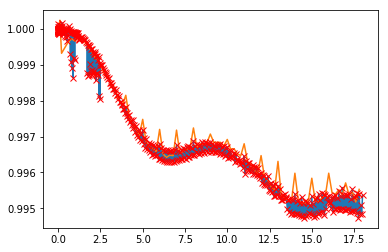

In [118]:
plt.plot(calrep_data["Frequency"],calrep_data["magS11"])
plt.plot(results_file["Frequency"],results_file["magS11"])
plt.plot(median_frame_device["Frequency"],median_frame_device["magS11"],"rx")

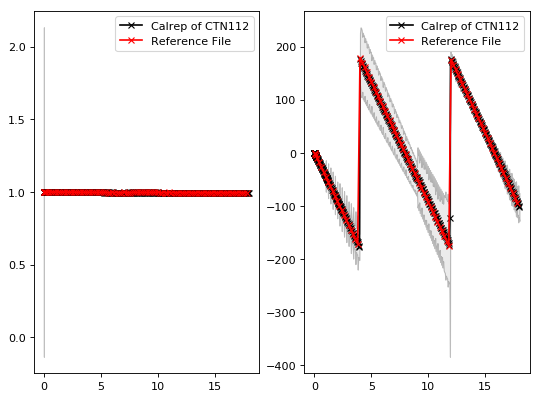

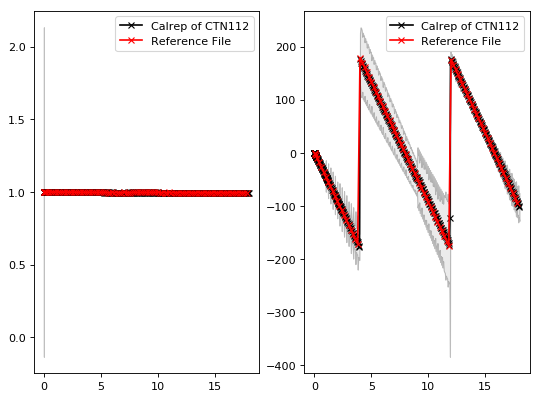

In [120]:
plot_calrep_results_comparison(calrep_data,results_model=results_file)

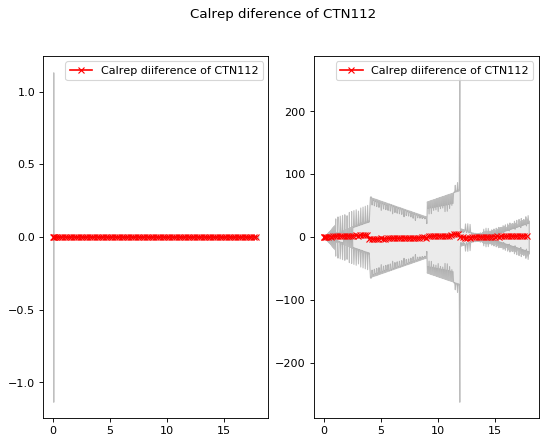

In [122]:
%matplotlib inline
fig=plot_calrep_results_difference_comparison(calrep_data,results_file,
                               display_legend=True);


In [92]:
print calrep_data

Calibration_Date = 
Calibration_Name = c050211.a2
Connector_Type_Calibration = 
Connector_Type_Measurement = N
Device_Description = Chk Std
Device_Id = CTN112
Measurement_Date = 25 Jan 2018
Measurement_Time = 11:08:16
Measurement_Type = 1-port
Nbs = 1
Number_Connects = 3
Number_Frequencies = 0
Number_Repeats = 1
Operator = RAG
Port_Used = 1
Program_Revision = 170113
Program_Used = MEASLP
Start_Frequency = 19
System_Id = HP8510
System_Letter = L
Frequency,magS11,uMbS11,uMaS11,uMdS11,uMgS11,argS11,uAbS11,uAaS11,uAdS11,uAgS11
0.0001,0.999957706093,0.5663498509,0.000470982314964,0.0,1.13270009347,-0.00741935483871,1.27342933223,0.000470982280139,0.0,2.54685883865
0.0002,0.999939426523,0.283509140628,0.000470987303584,0.0,0.567019063696,-0.0094623655914,1.25934306526,0.000470987268758,0.0,2.51868630667
0.0003,0.99997752809,0.18923021874,0.000470992292257,0.0,0.378461609774,-0.0119475655431,1.23873003326,0.00047099225743,0.0,2.4774602456
0.0004,0.999974551971,0.142091736564,0.000470997280982

In [123]:
raw.column_names

['Frequency', 'Direction', 'Connect', 'magS11', 'argS11']

In [124]:
list(set(raw["Direction"]))

[1]

In [ ]:
HTMLReport(HTMLBase)

In [41]:
toggle='<input type="button" class="toggleButton"  value="+" onclick="toggleId(\'{0}\',this)">'

DEFAULT_TOGGLE_SCRIPT="""<script type="text/javascript">


    function toggleId(id,$link){
    $node = document.getElementById(id);
    if (!$node)
    return;
    if (!$node.style.display || $node.style.display == 'none') {
    $node.style.display = 'block';
    $link.value = '-';
    } else {
    $node.style.display = 'none';
    $link.value = '+';
    }
  }
  </script>"""
DEFAULT_TOGGLE_STYLE="""<style>
  .toggleButton {
      background-color: white;
      border: 2px solid black;
       border-radius: 8px;
       color:red;
	   }
   .toggleButton:hover {
    box-shadow: 0 12px 16px 0 rgba(0,0,0,0.24), 0 17px 50px 0 rgba(0,0,0,0.19);
	}
    </stlye>"""

In [34]:
new_report.append_to_head(style_text)

In [26]:
new_report.append_to_body("<H1 id='test'>A test Heading</H1>")

In [30]:
new_report.append_to_body(toggle.format("test"))

In [39]:
new_report.show()

file://c:/users/sandersa/appdata/local/temp/1/tmpwrkxmp.html


In [38]:
new_report.append_to_body(toggle.format("NewTest2"))
new_report.append_to_body({"tag":"h1","text":"Test of toggle","id":"NewTest2"})

In [220]:
class HTMLReport(HTMLBase):
    def add_toggle_script(self,script=DEFAULT_TOGGLE_SCRIPT):
        """Adds a javascript template toggle script to the body of the HTML"""
        self.append_to_body(script)
        
    def add_toggle_style(self,style=DEFAULT_TOGGLE_STYLE):
        """Adds a css to format the javascript template, should be done once"""
        self.append_to_head(style)
        
    def add_toggle(self,tag_id=None):
        """Adds a toggle button that toggles the element with id tag_id. This can be used many times """
        toggle='<input type="button" class="toggleButton"  value="+" onclick="toggleId(\'{0}\',this)">'.format(tag_id)
        self.append_to_body(toggle)
    
    def embedd_image(self,image,image_mode="MatplotlibFigure",**options):
        """Embedds an image in the report. image_mode can be  MatplotlibFigure (a reference to the figure class), 
        Image (the PIL class),
        Base64 (a string of the values), 
        Png, Jpg, Bmp Tiff(the file name),
        or a Ndarray of the image values"""
        # might change this to self.ImageGraph and use it elsewhere
        image_graph=ImageGraph()
        image_graph.set_state(image_mode,image)
        image_graph.move_to_node("embeddedHTML")
        self.append_to_body(image_graph.data)
        
    def embedd_image_figure(self,image,image_mode="MatplotlibFigure",figure_id="image",caption="",style="",**options):
        """Embedds an image in the report. image_mode can be  MatplotlibFigure (a reference to the figure class), 
        Image (the PIL class),
        Base64 (a string of the values), 
        Png, Jpg, Bmp Tiff(the file name),
        or a Ndarray of the image values. The image is in a <figure id=figure_id> tag"""
        # might change this to self.ImageGraph and use it elsewhere
        image_graph=ImageGraph()
        image_graph.set_state(image_mode,image)
        image_graph.move_to_node("embeddedHTML")
        self.append_to_body("<figure id='{0}' style='{3}'>{1}<figcaption>{2}</figcaption></figure>".format(figure_id,
                                                                                               image_graph.data,
                                                                                               caption,style))
        
    def add_download_link(self,content_string,text="Download File",suggested_name="test.txt",mime_type="text/plain"):
        """Adds a download link to the report"""
        self.append_to_body(String_to_DownloadLink(content_string,text=text,
                                                 suggested_name=suggested_name,
                                                 mime_type=mime_type))

    def clear(self):
        """Clears all content in the HTML"""
        element_list=self.root.getchildren()
        for child in element_list:
            self.root.remove(child)
                                                   

In [96]:
new=HTMLReport()

In [97]:
new.add_toggle_script()
new.add_toggle_style()
new.add_toggle("ImageDiv")

Body tag was not present adding it
Head tag was not present adding it


In [99]:
new.embedd_image_figure(r"C:\ProgramData\Anaconda2\Lib\site-packages\pyMez\Documentation\Examples\jupyter\Python_Introduction_Images\example_plot_2.png",
                     "png","ImageDiv","Figure 1. A test image")


['edge_png_base64_000', 'edge_base64_embeddedHTML_000']
moving png -> base64
moving base64 -> embeddedHTML


In [101]:
new.show()

file://c:/users/sandersa/appdata/local/temp/1/tmppqxgwu.html


In [100]:
new.add_toggle("ImageDiv2")
new.embedd_image_figure(fig,
                     "MatplotlibFigure","ImageDiv2")

['edge_MatplotlibFigure_png_000', 'edge_png_base64_000', 'edge_base64_embeddedHTML_000']
moving MatplotlibFigure -> png
moving png -> base64
moving base64 -> embeddedHTML


In [93]:
new.to_pdf(r"C:\Share\New.pdf")

Loading pages (1/6)
Counting pages (2/6)                                               
Resolving links (4/6)                                                       
Loading headers and footers (5/6)                                           
Printing pages (6/6)
Done                                                                      


'C:\\Share\\New.pdf'

In [102]:
new.add_download_link(raw)

In [103]:
new.add_download_link(str(raw))

In [104]:
new.show()

file://c:/users/sandersa/appdata/local/temp/1/tmp9cdxwp.html


In [105]:
print raw

#HP8510      
#L 
#          
#N      
#1-port         
#25 Jan 2018    
#11:08:16  
#MEASLP    
#170113    
#RAG       
#c050211.a2     
#               
# 1
# 3
# 1
#  1
#   0
# 19
#Chk Std                                                     
#CTN112              
Frequency,Direction,Connect,magS11,argS11
0.10000,1,1,1.0001,-4.54
0.10000,1,2,1.0000,-4.54
0.10000,1,3,1.0000,-4.54
0.20000,1,1,1.0000,-9.09
0.20000,1,2,1.0000,-9.09
0.20000,1,3,1.0000,-9.09
0.30000,1,1,0.9999,-13.64
0.30000,1,2,0.9999,-13.64
0.30000,1,3,0.9999,-13.63
0.40000,1,1,0.9998,-18.19
0.40000,1,2,0.9998,-18.18
0.40000,1,3,0.9998,-18.17
0.50000,1,1,0.9997,-22.74
0.50000,1,2,0.9996,-22.73
0.50000,1,3,0.9997,-22.72
0.60000,1,1,0.9995,-27.29
0.60000,1,2,0.9995,-27.27
0.60000,1,3,0.9995,-27.27
0.70000,1,1,0.9993,-31.84
0.70000,1,2,0.9993,-31.83
0.70000,1,3,0.9993,-31.81
0.80000,1,1,0.9991,-36.39
0.80000,1,2,0.9991,-36.38
0.80000,1,3,0.9991,-36.36
0.90000,1,1,0.9989,-40.94
0.90000,1,2,0.9990,-40.92
0.90000,1,3,0.9990,-4

In [106]:
raw.structure_metadata()

In [108]:
print raw.get_header_string()

#HP8510      
#L 
#          
#N      
#1-port         
#25 Jan 2018    
#11:08:16  
#MEASLP    
#170113    
#RAG       
#c050211.a2     
#               
# 1
# 3
# 1
#  1
#   0
# 19
#Chk Std                                                     
#CTN112              



In [129]:
ONE_PORT_DTYPE={'Frequency':'float',
                 'Direction':'str',
                 'Connect':'str',
                 'System_Id':'str',
                 'System_Letter':'str',
                 'Connector_Type_Calibration':'str',
                 'Connector_Type_Measurement':'str',
                 'Measurement_Type':'str',
                 'Measurement_Date':'str',
                 'Measurement_Time':'str',
                 'Program_Used':'str',
                 'Program_Revision':'str',
                 'Operator':'str',
                 'Calibration_Name':'str',
                 'Calibration_Date':'str',
                 'Port_Used':'int',
                 'Number_Connects':'str',
                 'Number_Repeats':'str',
                 'Nbs':'str',
                 'Number_Frequencies':'str',
                 'Start_Frequency':'float',
                 'Device_Description':'str',
                 'Device_Id':'str',
                 'Measurement_Timestamp':'str',
                }

In [477]:
class CheckStandardReport(HTMLReport):
    """Class that creates a report based on a calibrated measurement of a checkstandard. Input can be a file path to 
    any of the ascii data
    types returned by the modified measlp program or a multiconnect mulitdirectional set of
    measurements in magnitude / angle format.
    The locations of the 
    CheckStandard data bases in csv format and the directory of the results files are required.
    The report is composed of:
    1. A plot of the raw file
    2. A plot of the file with calrep style errors
    3. A plot comparing the file with calrep style errors to the old results database
    4. A plot comparing the difference of the file to the old results database  
    5. A plot comparing the file with calrep style errors to the mean of the new database with outliers excluded
    6. A history plot of the check standard for the current measurement and the last n measurements (default is 5)
    7. A complete history plot of the check standard
    8. A set of download links in text and the formats set in options 
    
    If no file is specified and a checkstandard_name is, then only history and means of that checkstandard are shown in the 
    report"""
    def __init__(self,file_path=None,**options):
        """Initializes the CheckStandardReport Class"""
        defaults={"Device_Id":"CTN112",
                 "results_directory":r'C:\Share\resfiles',
                 "one_port_csv":COMBINED_ONE_PORT_CHKSTD_CSV,
                 "two_port_csv":COMBINED_TWO_PORT_CHKSTD_CSV,
                 "two_port_nr_csv":TWO_PORT_NR_CHKSTD_CSV,
                 "power_csv":COMBINED_POWER_CHKSTD_CSV,
                 "outlier_removal":True,
                 "last_n":5,
                 "download_formats":["Csv"]
                 }
        self.options={}
        for key,value in defaults.iteritems():
            self.options[key]=value
        for key,value in options.iteritems():
            self.options[key]=value
        self.conversion_defaults = {"base_name": None,
                "nodes": ['XmlFile', 'CsvFile', 'ExcelFile', 'OdsFile', 'MatFile', 'HtmlFile', 'JsonFile'],
                "extensions": ['xml', 'csv', 'xlsx', 'ods', 'mat', 'html', 'json'],
                "mime_types": ['application/xml', 'text/plain',
                               'application/vnd.openxmlformats-officedocument.spreadsheetml.sheet',
                               'application/vnd.oasis.opendocument.spreadsheet',
                               'application/x-matlab-data', 'text/html', 'application/json']}
        #html_options={}
            
        HTMLReport.__init__(self,None,**self.options)
        self.plots=[]
        self.plot_ids=[]
        self.plot_titles=[]
        self.plot_captions=[]
        # set up dtypes for pandas
        one_port_dtype=ONE_PORT_DTYPE
        # this reads the NISTModels constant
        if COMBINE_S11_S22:
            one_port_dtype["arg"]='float'
            one_port_dtype["mag"]='float'
        else:
            one_port_dtype["argS11"]='float'
            one_port_dtype["magS11"]='float'
            one_port_dtype["argS22"]='float'
            one_port_dtype["magS22"]='float'
        # create a history dictionary.
        #print("{0} is {1}".format("self.options",self.options))
        self.history_dict={'1-port':pandas.read_csv(self.options["one_port_csv"],dtype=one_port_dtype),
                        '2-port':pandas.read_csv(self.options["two_port_csv"]),
                        '2-portNR':pandas.read_csv(self.options["two_port_nr_csv"]),
                        'power':pandas.read_csv(self.options["power_csv"])}


        if file_path is None:
            # plot the results file
            self.build_checkstandard_report()
        else:
            self.build_comparison_report(file_path)


    def build_checkstandard_report(self):
        """Builds the report for the options Device_Id"""
        self.clear()
        self.plots=[]
        self.plot_ids=[]
        self.plot_captions=[]
        self.plot_titles=[]
        measurement_type=self.options["Device_Id"][-3]
        if re.match("1",measurement_type):
            self.options["Measurement_Type"]="1-port"
        elif re.match("2",measurement_type):
            self.options["Measurement_Type"]="2-port"
        elif re.match("p",measurement_type,re.IGNORECASE):
            self.options["Measurement_Type"]="2-port"
            
        self.results_file=ResultFileModel(os.path.join(self.options["results_directory"],self.options["Device_Id"]))               
        options={"Device_Id":self.options["Device_Id"], "System_Id":None,"Measurement_Timestamp":None, 
                      "Connector_Type_Measurement":None,
                     "Measurement_Date":None,"Measurement_Time":None,"outlier_removal":False}
        if re.search('2-port',self.options["Measurement_Type"],re.IGNORECASE):
            history_key='2-port'
            options["column_names"]=['Frequency','magS11','argS11','magS21','argS21','magS22','argS22']

        elif re.search('1-port',self.options["Measurement_Type"],re.IGNORECASE):
            history_key='1-port'
            if COMBINE_S11_S22:
                options["column_names"]=['Frequency','magS11','argS11']
            else:    
                options["column_names"]=['Frequency','magS11','argS11','magS22','argS22']
        elif re.search('Dry Cal|Thermistor|power',self.options["Measurement_Type"],re.IGNORECASE):
            history_key='power'
            options["column_names"]=['Frequency','magS11','argS11','Efficiency','Calibration_Factor']
        #print history[history_key][:5]
        #print history_key
        database=self.history_dict[history_key]
        self.device_history=database[database["Device_Id"]==self.options["Device_Id"]] 
        if self.options["outlier_removal"]:
            self.outlier_removal()
        self.mean_frame=mean_from_history(self.device_history,**options)
        self.plots.append(plot_checkstandard_history(self.device_history))
        self.plot_ids.append("completeHistory")
        self.plot_titles.append("The Complete History of {0}".format(self.options["Device_Id"]))
        self.plot_captions.append("""Figure {0}. Every measurement of {1} currently
        in the database.""".format(len(self.plots),self.options["Device_Id"]))
        
        self.plots.append(plot_checkstandard_history(self.device_history,
                                                     min_num=len(self.get_measurement_dates())- self.options["last_n"]-1,
                              max_num=len(self.get_measurement_dates())-1,extra_plots=[self.results_file,
                                                                                             self.mean_frame],
                              extra_plot_labels=["Historical Database","Mean of New Database"],extra_plot_formats=["r--","k^"]))
        self.plot_ids.append("partialHistory")
        self.plot_titles.append("""The last {0} measurements of {1} 
        compared with the historical database and mean. """.format(self.options["last_n"],self.options["Device_Id"]))
        self.plot_captions.append("""Figure {0}. Last  {1} measurements of {2} 
        compared with historical database and mean""".format(len(self.plots),
                                                             self.options["last_n"],self.options["Device_Id"]))
        
        
        self.add_toggle_support()
        summary_text="""
        This device has been measured {0} times from {1} to {2}""".format(len(self.get_measurement_dates()),
                                                                          min(self.get_measurement_dates()),
                                                                          max(self.get_measurement_dates()))
        self.add_report_heading()
        self.append_to_body({"tag":"p","text":summary_text})
        self.add_all_plots() 

        
    def build_comparison_report(self,raw_file_path=None):
        """Builds the report for a raw file comparison, requires a raw_file_path to process"""
        self.clear()
        self.plots=[]
        self.plot_ids=[]
        self.plot_captions=[]
        self.plot_titles=[]
        self.raw_measurement_model=sparameter_power_type(raw_file_path)
        self.raw_measurement=globals()[self.raw_measurement_model](raw_file_path)
        #print("{0} is {1}".format("self.raw_measurement.column_names",self.raw_measurement.column_names))
        table=self.raw_measurement
        self.options["Device_Id"]=table.metadata["Device_Id"]
        self.plots.append(self.raw_measurement.show())
        self.plot_ids.append("rawMeasurement")
        self.plot_titles.append("Raw Measurement of {0}".format(self.options["Device_Id"]))
        self.plot_captions.append("""Figure {0}. Raw measurement of {1}. The measurement of check standard {1} 
        in a calibrated mode.""".format(len(self.plots),self.options["Device_Id"]))
        self.calrep_measurement=calrep(self.raw_measurement)
        self.plots.append(plot_calrep(self.calrep_measurement))
        self.plot_ids.append("clarepMeasurement")
        self.plot_titles.append("Plot of {0} with uncertainty".format(self.options["Device_Id"]))
        self.plot_captions.append("""Figure {0}. Measurement of {1}. The measurement of check standard {1} 
        with nist total uncertainty.""".format(len(self.plots),self.options["Device_Id"]))
        self.plots.append(plot_calrep_uncertainty(self.calrep_measurement))
        self.plot_ids.append("clarepUncert")
        self.plot_titles.append("Plot  Uncertainty Components".format(self.options["Device_Id"]))
        self.plot_captions.append("""Figure {0}. Uncertainty Components. 
        The uncertainty in measurement of check standard {1} 
        .""".format(len(self.plots),self.options["Device_Id"]))
        try:
            self.results_file=ResultFileModel(os.path.join(self.options["results_directory"],
                                                           self.calrep_measurement.metadata["Device_Id"]))
        except:
            self.results_file=None
        options={"Device_Id":table.metadata["Device_Id"], "System_Id":table.metadata["System_Id"],"Measurement_Timestamp":None, 
                      "Connector_Type_Measurement":table.metadata["Connector_Type_Measurement"],
                     "Measurement_Date":None,"Measurement_Time":None,"outlier_removal":False}
        if re.search('2-port',
                     table.metadata["Measurement_Type"],
                     re.IGNORECASE) and not re.search('2-portNR',
                                                     table.metadata["Measurement_Type"],
                                                     re.IGNORECASE):
            history_key='2-port'
            options["column_names"]=['Frequency','magS11','argS11','magS21','argS21','magS22','argS22']
        elif re.search('2-portNR',table.metadata["Measurement_Type"],re.IGNORECASE):
            history_key='2-portNR'
            options["column_names"]=['Frequency','magS11','argS11','magS12','argS12','magS21','argS21','magS22','argS22']
        elif re.search('1-port',table.metadata["Measurement_Type"],re.IGNORECASE):
            history_key='1-port'
            if COMBINE_S11_S22:
                options["column_names"]=['Frequency','magS11','argS11']
            else:    
                options["column_names"]=['Frequency','magS11','argS11','magS22','argS22']
        elif re.search('Dry Cal|Thermistor|power',table.metadata["Measurement_Type"],re.IGNORECASE):
            history_key='power'
            options["column_names"]=['Frequency','magS11','argS11','Efficiency','Calibration_Factor']
        #print history[history_key][:5]
        #print history_key
        database=self.history_dict[history_key]
        self.device_history=database[database["Device_Id"]==self.options["Device_Id"]]
        if self.options["outlier_removal"]:
            self.outlier_removal()
        self.mean_frame=mean_from_history(self.device_history.copy(),**options)
        #print mean_frame
        self.difference_frame=raw_difference_frame(table,self.mean_frame)
        #print("{0} is {1}".format("self.raw_measurement.column_names",self.raw_measurement.column_names))
        #print difference_frame
        self.plots.append(raw_comparison_plot_with_residuals(table,self.mean_frame,self.difference_frame))
        self.plot_ids.append("rawSummary")
        self.plot_titles.append("Summary of Measurement and Mean of Complete Database with Resisduals")
        self.plot_captions.append("""Figure {0}. Summary of Measurement and Mean with Resisduals. 
        Data for all measurements are being used""".format(len(self.plots)))
#         stop_time=datetime.datetime.now()
#         diff=stop_time-start_time 
        self.plots.append(plot_calrep_results_comparison(self.calrep_measurement,self.results_file,
                               display_legend=True))
        self.plot_ids.append("compareWithUncertainty")
        self.plot_titles.append("Measurement with Uncertainties compared with Historical Database")
        self.plot_captions.append("""Figure {0}. Measurement with Uncertainties compared with Historical Database. 
        This is the current selection criteria""".format(len(self.plots)))

        self.plots.append(plot_calrep_results_difference_comparison(self.calrep_measurement,
                                                                                        self.results_file,
                                                                                        display_legend=True))
        self.plot_ids.append("compareWithUncertaintyDifference")
        self.plot_titles.append("The Difference of Measurement with Uncertainties compared with Historical Database")
        self.plot_captions.append("""Figure {0}. The Difference of Measurement with Uncertainties 
        compared with Historical Database.
        This is the current selection criteria.""".format(len(self.plots)))
        
        column_names=return_calrep_value_column_names(self.calrep_measurement)
        error_column_names=return_calrep_error_column_names(column_names)   
        self.standard_error=standard_error_data_table(self.calrep_measurement,self.results_file,
                                         table_1_uncertainty_column_names=error_column_names,
                                        value_column_names=column_names,expansion_factor=1)
        number_columns_pass=self.standard_error.get_conformation_dictionary().values().count(True)
        number_columns=len(self.standard_error.get_conformation_dictionary().values())
        good=int(round(float(number_columns_pass-1)/float(number_columns-1)))
        pass_fail=""
        if good:
            pass_fail="Passes"
        else:
            pass_fail="FAILS"
        self.plots.append(self.standard_error.show())
        self.plot_ids.append("standardErrror")
        self.plot_titles.append("The Standard Error of Measurement with Uncertainties compared with Historical Database")
        self.plot_captions.append("""Figure {0}. The Standard Error of Measurement with Uncertainties 
        compared with Historical Database.
        This is the current selection criteria.""".format(len(self.plots)))
        
        
        self.plots.append(plot_checkstandard_history(self.device_history))
        self.plot_ids.append("completeHistory")
        self.plot_titles.append("The Complete History of {0}".format(self.options["Device_Id"]))
        self.plot_captions.append("""Figure {0}. Every measurement of {1} currently
        in the database.""".format(len(self.plots),self.options["Device_Id"]))
        
        self.plots.append(plot_checkstandard_history(self.device_history,
                                                     min_num=len(self.get_measurement_dates())- self.options["last_n"]-1,
                              max_num=len(self.get_measurement_dates())-1,extra_plots=[self.results_file,
                                                                                             self.mean_frame],
                              extra_plot_labels=["Historical Database","Mean of New Database"],extra_plot_formats=["r--","k^"]))
        self.plot_ids.append("partialHistory")
        self.plot_titles.append("""The last {0} measurements of {1} 
        compared with the historical database and mean. """.format(self.options["last_n"],self.options["Device_Id"]))
        self.plot_captions.append("""Figure {0}. Last  {1} measurements of {2} 
        compared with historical database and mean""".format(len(self.plots),
                                                             self.options["last_n"],self.options["Device_Id"]))
        
        
        self.add_toggle_support()
        summary_text="""This is a summary of the measurement of {0} made on {1} by {2}. This measurement
        {3} the checkstandard process. 
        This device has been measured {4} times from {5} to {6}""".format(self.options["Device_Id"],
                                                                          self.raw_measurement.metadata["Measurement_Date"],
                                                                          self.raw_measurement.metadata["Operator"],
                                                                          pass_fail,
                                                                          len(self.get_measurement_dates()),
                                                                          min(self.get_measurement_dates()),
                                                                          max(self.get_measurement_dates()))
        self.add_report_heading()
        self.append_to_body({"tag":"p","text":summary_text})
        self.add_download_table()
        self.add_table_border_style()
        self.add_metadata_section()
        self.add_all_plots() 
        
    def get_measurement_dates(self):
        """Returns measurement dates from self.device_history"""
        dates=sorted(self.device_history["Measurement_Timestamp"].unique())
        self.measurement_dates=dates[:]
        return dates
    
    def outlier_removal(self):
        """Removes outliers frome self.device_history"""
        mean_s11=np.mean(self.device_history["magS11"])
        std_s11=np.std(self.device_history["magS11"])
        self.device_history=self.device_history[self.device_history["magS11"]<(mean_s11+3*std_s11)]
        self.device_history = self.device_history[self.device_history["magS11"] > (mean_s11 - 3 * std_s11)] 
        
    def add_all_plots(self,**options):
        """Adds all plots in the attribute self.plots"""
        defaults={"clear_before":False,
                  "style":"display:none",
                 "figure_width":14}
        add_options={}
        for key,value in defaults.iteritems():
            add_options[key]=value
        for key,value in options.iteritems():
            add_optionss[key]=value
        if add_options["clear_before"]:
            self.clear()
        for index,plot in enumerate(self.plots):
            id_text=self.plot_ids[index]
            self.append_to_body({"tag":"hr"})
            self.append_to_body({"tag":"h2","text":self.plot_titles[index]})
            self.add_toggle(id_text)
            plot.set_figwidth(add_options["figure_width"])
            self.embedd_image_figure(plot,figure_id="{0}".format(id_text),
                                     style=add_options["style"],caption=self.plot_captions[index])
            self.append_to_body({"tag":"hr"})
            
    def add_report_heading(self,heading_text=None,**options):
        """Adds a heading to the report, clears the report by default"""
        defaults={"clear_before":False}
        add_options={}
        for key,value in defaults.iteritems():
            add_options[key]=value
        for key,value in options.iteritems():
            add_optionss[key]=value
        if add_options["clear_before"]:
            self.clear()
        if heading_text is None:
            heading_text="Check Standard Report for {0}".format(self.options["Device_Id"])
        self.append_to_body({"tag":"h1","text":heading_text})
        
    def add_toggle_support(self):
        """Adds a toggle style and script to the report"""
        self.add_toggle_script()
        self.add_toggle_style()
        
    def add_download_table(self,
                           download_formats=["CsvFile","ExcelFile"],
                           download_extensions=["csv","xlsx"],
                           mime_types=["text/plain",'application/vnd.openxmlformats-officedocument.spreadsheetml.sheet'],
                           **options):
        """Adds a table of downloadable files"""
        defaults={"clear_before":False,
                  "download_files":[self.raw_measurement,self.calrep_measurement,self.results_file,
                                    self.mean_frame,self.device_history],
                  "download_files_input_format":["AsciiDataTable","AsciiDataTable","AsciiDataTable","DataFrame","DataFrame"],
                  "download_files_base_names":["Raw_Measurement.txt",
                                               "Measurement_NIST_Uncertainties.txt",
                                               "Historical_Database.txt",
                                               "Mean_Database.txt",
                                               "Device_History.txt"],
                  "style":"display:none;border:1;"}

        add_options={}
        for key,value in defaults.iteritems():
            add_options[key]=value
        for key,value in options.iteritems():
            add_optionss[key]=value
        if add_options["clear_before"]:
            self.clear()
        self.append_to_body({"tag":"h2","text":"Downloads"})
        self.add_toggle("downloads")
        table_graph=TableGraph()
        # convert all data to AsciiDataTable format
        download_table="<table id='downloads' style='{0}'>".format(add_options["style"])
        for index,download in enumerate(add_options["download_files"][:]):
            if add_options["download_files_input_format"][index] not in ["AsciiDataTable"]:
                table_graph.set_state(add_options["download_files_input_format"][index],download)
                table_graph.move_to_node("AsciiDataTable")
                download=table_graph.data.copy()
            # now we cycle throught the download formats, for each file we load the graph and then create the download links
            ascii_download=String_to_DownloadLink(string=str(download),
                                                  mime_type="text/plain",
                                                  suggested_name=add_options["download_files_base_names"][index],
                                                  text=add_options["download_files_base_names"][index])
            print("{0} is {1}".format("index",index))
            table_graph.set_state("AsciiDataTable",download)

            download_links=TableGraph_to_Links(table_graph,
                                               base_name=add_options["download_files_base_names"][index],
                                               nodes=download_formats,
                                               extensions=download_extensions,
                                               mime_types=mime_types)
            
            download_table=download_table+"<tr><td>{0}</td><td>{1}</td></tr>".format(ascii_download,download_links)
        download_table=download_table+"</table>"
        self.append_to_body(download_table)
        self.append_to_body({"tag":"hr"})
        
    def add_metadata_section(self,style="display:none;border: 1px solid black;"):
        """Adds a metadata section if self.raw_measurement exits"""
        try:
            self.append_to_body({"tag":"h2","text":"Measurement Metadata"})
            self.add_toggle("metadata")
            self.append_to_body({"tag":"hr"})
            meta_table="<table id='metadata' style='{0}'>".format(style)
            for key,value in self.raw_measurement.metadata.iteritems():
                meta_table=meta_table+"<tr><td>{0}</td><td>{1}</td></tr>".format(key,value)
            meta_table=meta_table+"</table>"
            self.append_to_body(meta_table)
        except:pass
        
    def add_table_border_style(self):
        """Adds a css style tag to the head of the sheet to display all borders"""
        self.append_to_head({"tag":"style","text":"""table, th, td {
        border: 1px solid black;}"""})
        
        

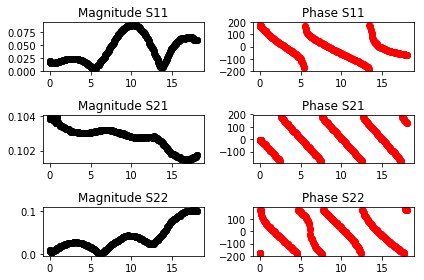

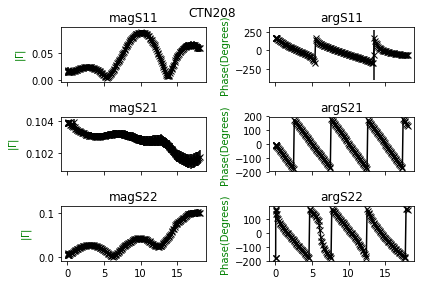

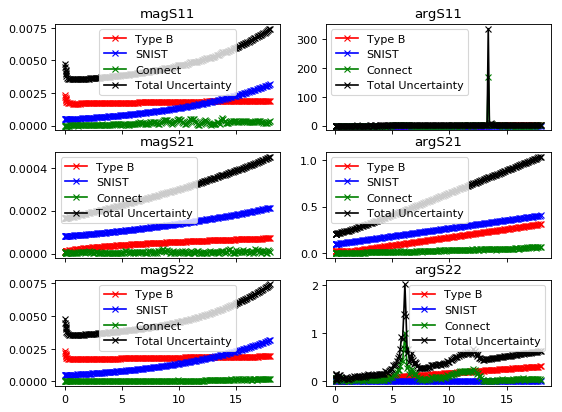

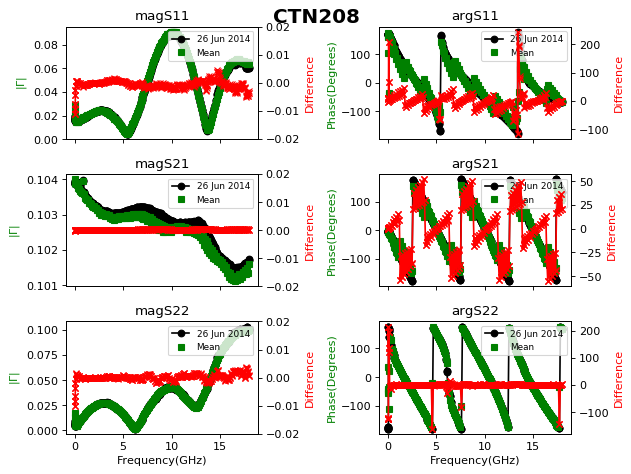

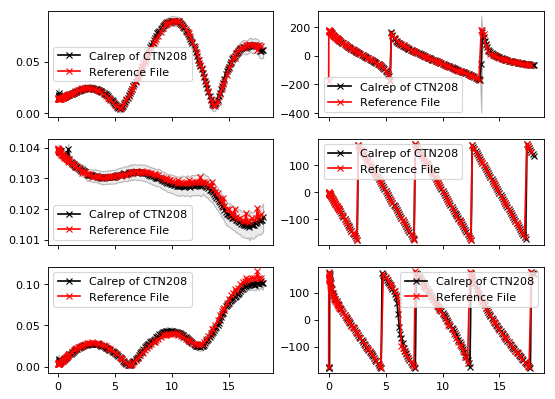

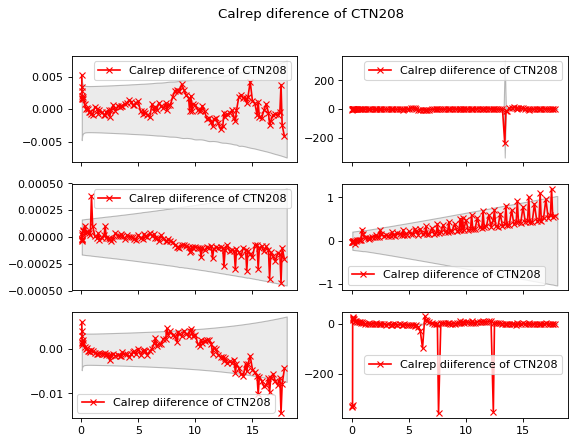

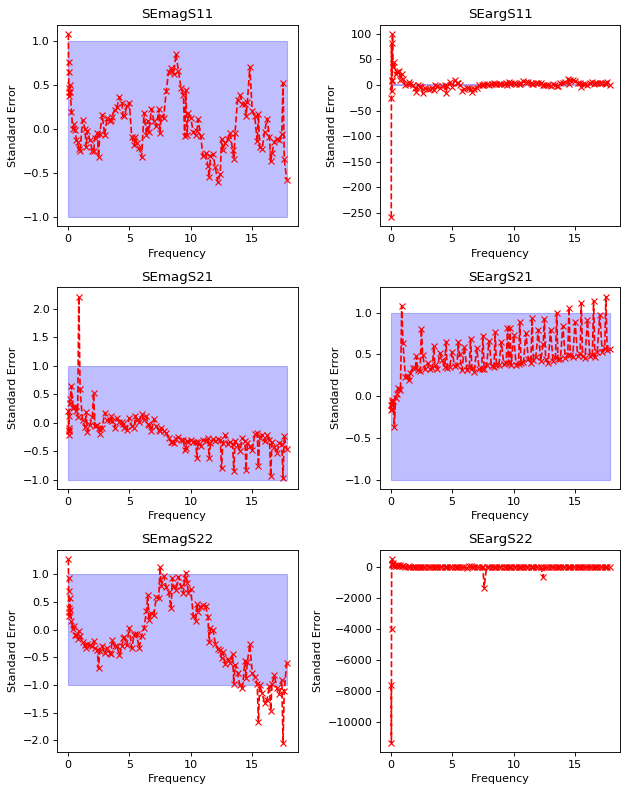

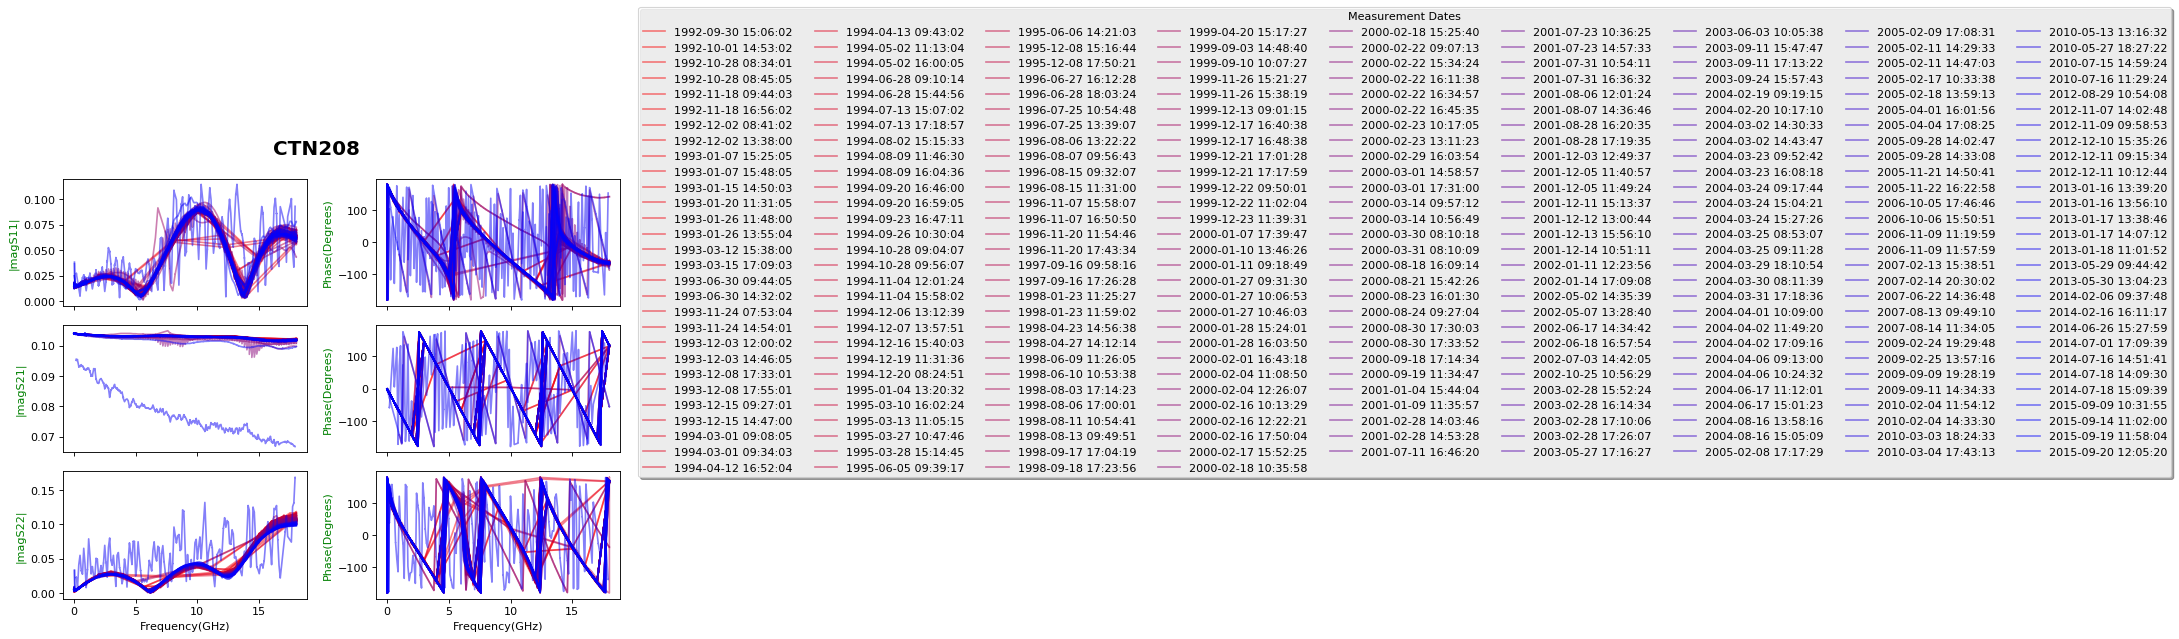

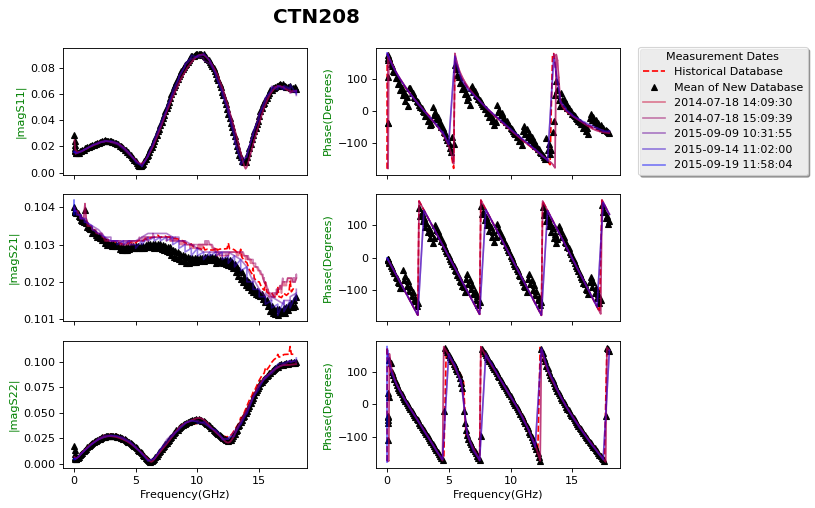

Body tag was not present adding it
Head tag was not present adding it
index is 0
['edge_AsciiDataTable_DataFrame_000', 'edge_DataFrame_CsvFile_000']
moving AsciiDataTable -> DataFrame
moving DataFrame -> CsvFile
['edge_CsvFile_DataFrame_000', 'edge_DataFrame_ExcelFile_000']
moving CsvFile -> DataFrame
moving DataFrame -> ExcelFile
index is 1
['edge_AsciiDataTable_DataFrame_000', 'edge_DataFrame_CsvFile_000']
moving AsciiDataTable -> DataFrame
moving DataFrame -> CsvFile
['edge_CsvFile_DataFrame_000', 'edge_DataFrame_ExcelFile_000']
moving CsvFile -> DataFrame
moving DataFrame -> ExcelFile
index is 2
['edge_AsciiDataTable_DataFrame_000', 'edge_DataFrame_CsvFile_000']
moving AsciiDataTable -> DataFrame
moving DataFrame -> CsvFile
['edge_CsvFile_DataFrame_000', 'edge_DataFrame_ExcelFile_000']
moving CsvFile -> DataFrame
moving DataFrame -> ExcelFile
['edge_DataFrame_AsciiDataTable_000']
moving DataFrame -> AsciiDataTable
index is 3
['edge_AsciiDataTable_DataFrame_000', 'edge_DataFrame_Csv

In [479]:
new_report=CheckStandardReport(r"C:?\Share\Ck_Std_raw_ascii\CTN208.R1_062614")
new_report.show()

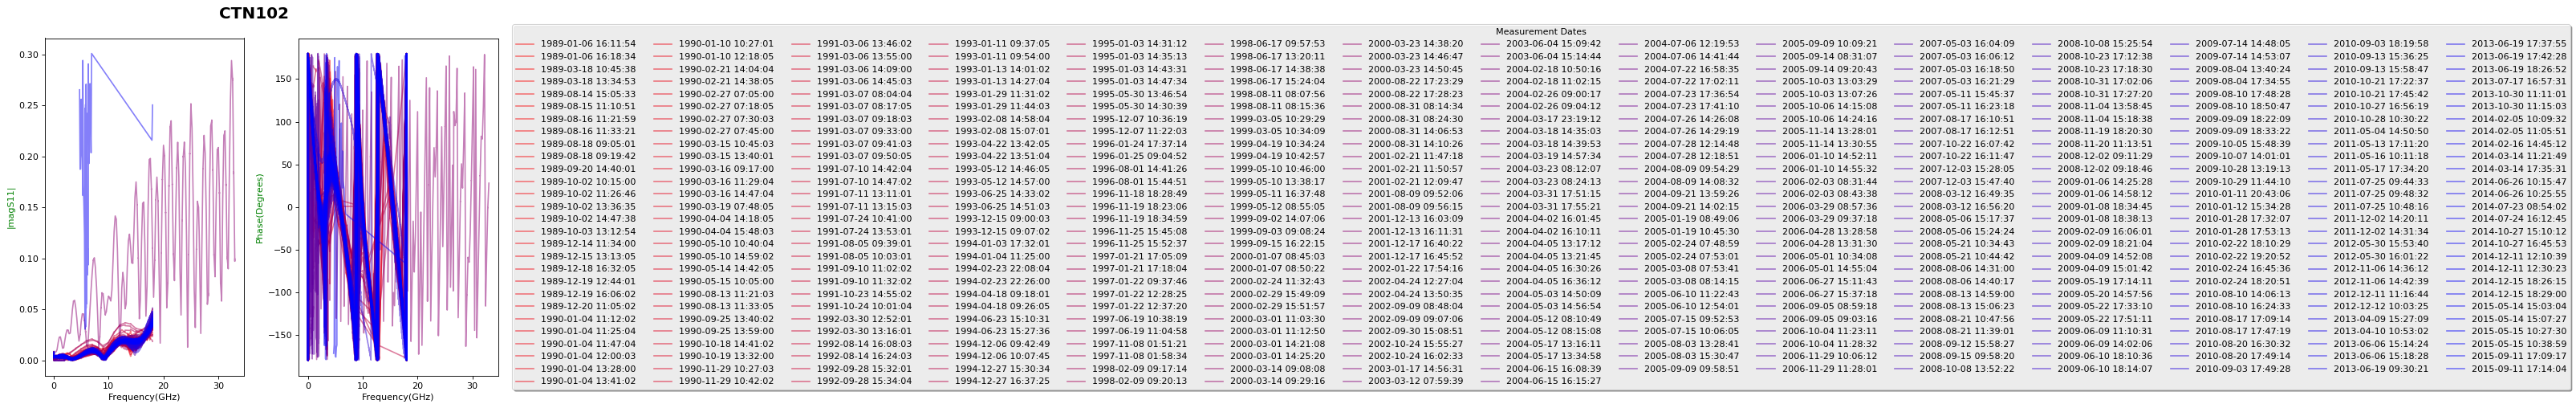

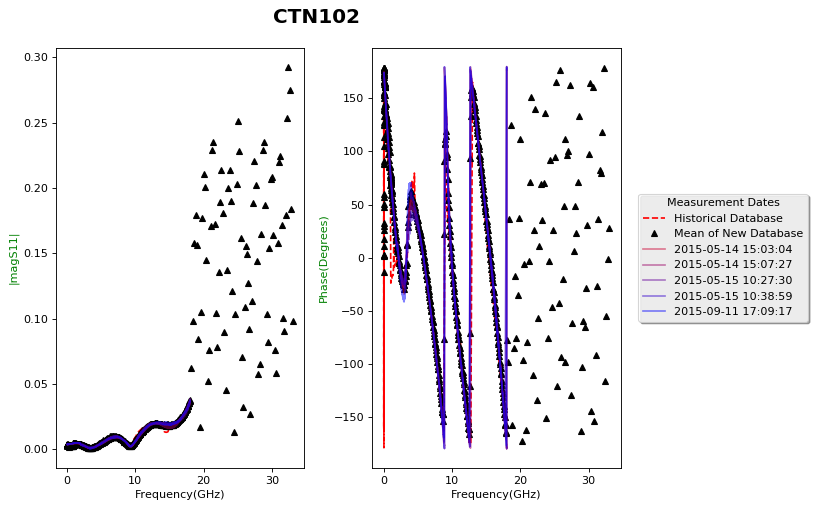

Body tag was not present adding it
Head tag was not present adding it
['edge_MatplotlibFigure_png_000', 'edge_png_base64_000', 'edge_base64_embeddedHTML_000']
moving MatplotlibFigure -> png
moving png -> base64
moving base64 -> embeddedHTML
['edge_MatplotlibFigure_png_000', 'edge_png_base64_000', 'edge_base64_embeddedHTML_000']
moving MatplotlibFigure -> png
moving png -> base64
moving base64 -> embeddedHTML


In [426]:
new_report=CheckStandardReport(None,Device_Id="CTN102")

In [419]:
new_report.show()

file://c:/users/sandersa/appdata/local/temp/1/tmpixlvrx.html


In [406]:
new_report.get_measurement_dates()

['1994-06-24 10:21:16',
 '1994-06-24 12:15:53',
 '1996-08-02 16:42:29',
 '1996-08-02 16:47:55',
 '1997-04-15 14:44:35',
 '1997-04-16 09:45:35',
 '1997-05-15 15:12:05',
 '1997-05-15 16:21:38',
 '1997-05-15 16:47:28',
 '1997-05-19 12:00:22',
 '1997-05-19 12:10:09',
 '1997-09-15 13:58:45',
 '1998-02-09 08:32:51',
 '1998-02-09 08:39:22',
 '1998-09-17 10:25:31',
 '1998-09-18 17:51:52',
 '1998-09-24 14:54:10',
 '1998-09-24 18:22:31',
 '1998-09-28 15:16:01',
 '1998-09-28 16:04:02',
 '1998-09-29 10:28:11',
 '1998-09-29 10:39:37',
 '1998-09-30 17:28:35',
 '1998-09-30 17:34:43',
 '1999-04-20 11:04:42',
 '1999-04-20 11:13:56',
 '1999-09-15 16:25:54',
 '1999-09-17 10:46:27',
 '1999-09-17 10:48:43',
 '1999-09-17 16:49:22',
 '1999-09-20 16:52:43',
 '2000-01-13 11:31:51',
 '2000-01-13 14:17:39',
 '2000-01-14 11:20:04',
 '2000-01-14 11:26:32',
 '2000-01-18 12:18:44',
 '2000-01-18 14:13:18',
 '2000-01-18 16:16:30',
 '2000-01-18 16:56:53',
 '2000-01-20 10:05:28',
 '2000-01-20 10:42:52',
 '2000-01-20 12:

In [428]:
new_report.show()

file://c:/users/sandersa/appdata/local/temp/1/tmpcfxnpy.html


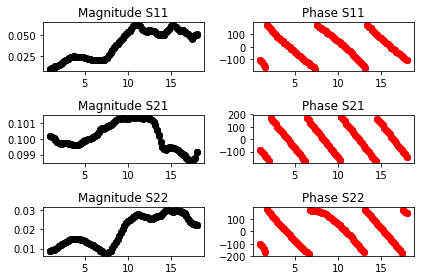

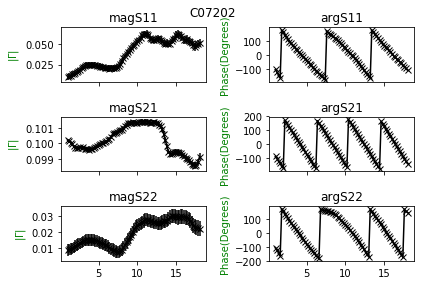

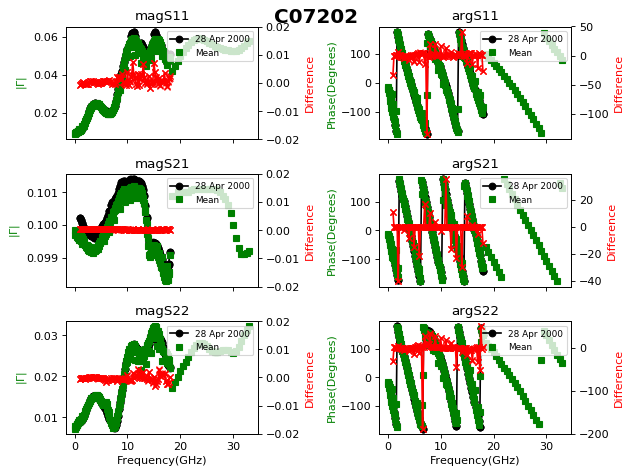

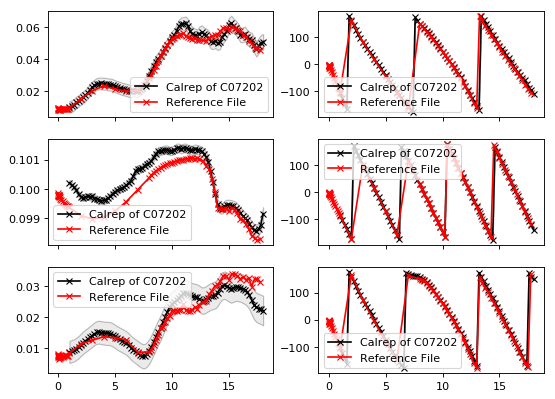

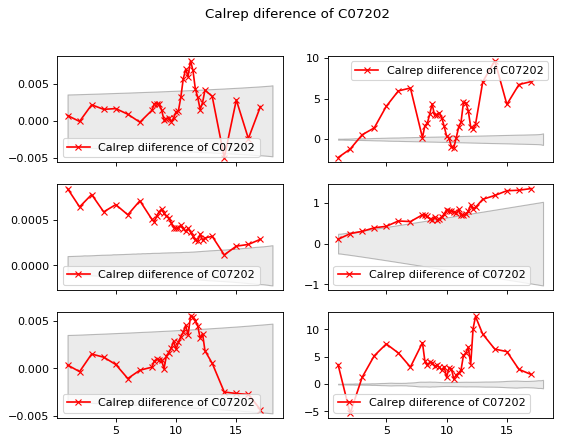

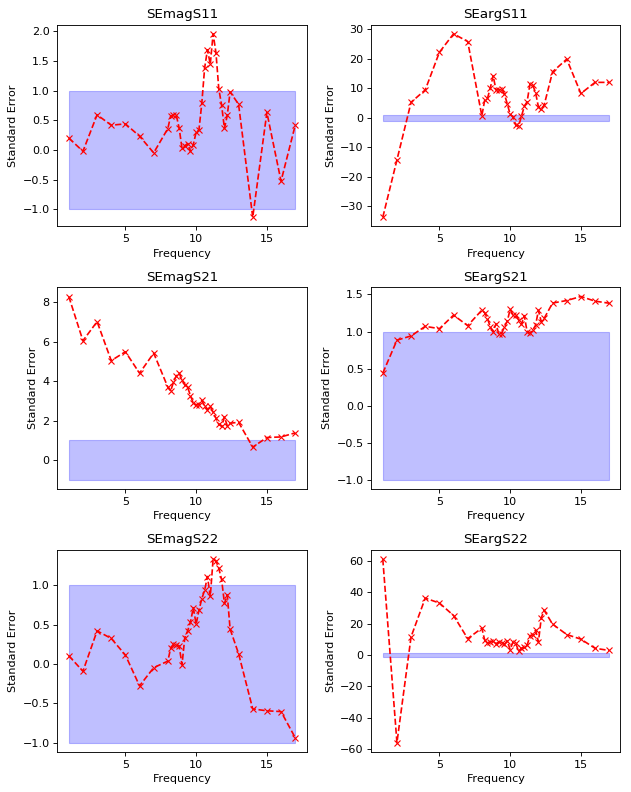

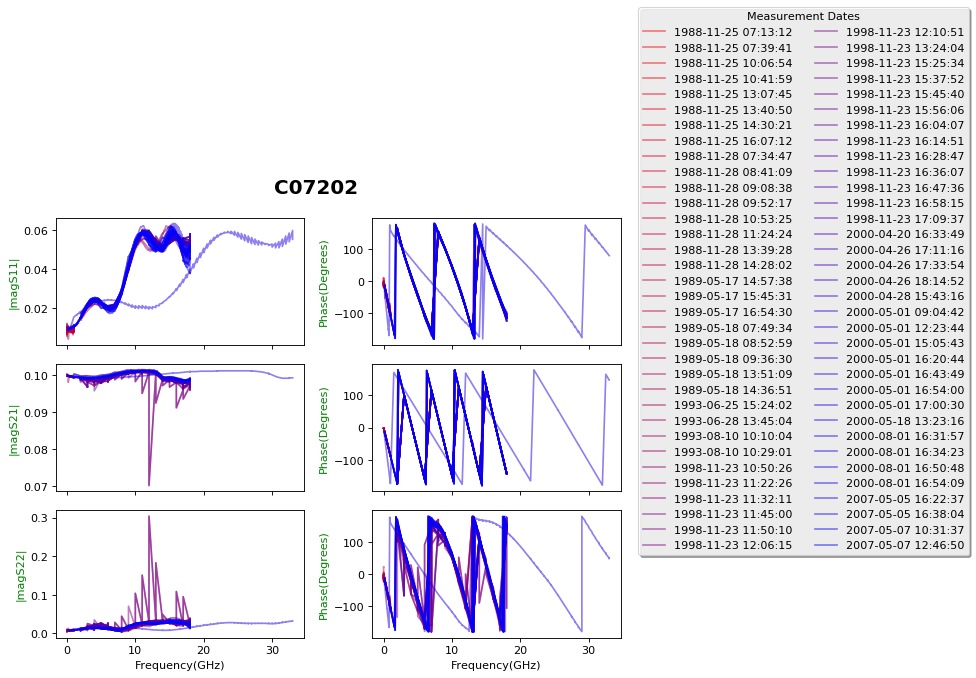

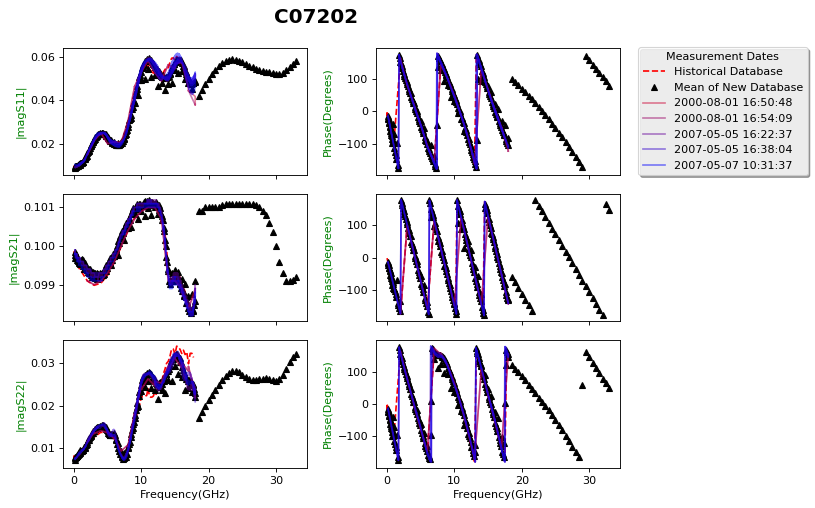

Body tag was not present adding it
Head tag was not present adding it
['edge_AsciiDataTable_DataFrame_000', 'edge_DataFrame_CsvFile_000']
moving AsciiDataTable -> DataFrame
moving DataFrame -> CsvFile
['edge_AsciiDataTable_DataFrame_000', 'edge_DataFrame_CsvFile_000']
moving AsciiDataTable -> DataFrame
moving DataFrame -> CsvFile
['edge_DataFrame_AsciiDataTable_000']
moving DataFrame -> AsciiDataTable
['edge_AsciiDataTable_DataFrame_000', 'edge_DataFrame_CsvFile_000']
moving AsciiDataTable -> DataFrame
moving DataFrame -> CsvFile
['edge_MatplotlibFigure_png_000', 'edge_png_base64_000', 'edge_base64_embeddedHTML_000']
moving MatplotlibFigure -> png
moving png -> base64
moving base64 -> embeddedHTML
['edge_MatplotlibFigure_png_000', 'edge_png_base64_000', 'edge_base64_embeddedHTML_000']
moving MatplotlibFigure -> png
moving png -> base64
moving base64 -> embeddedHTML
['edge_MatplotlibFigure_png_000', 'edge_png_base64_000', 'edge_base64_embeddedHTML_000']
moving MatplotlibFigure -> png
mo

In [427]:
new_report.build_comparison_report(r"C:\Share\Ck_Std_raw_ascii\C07202.L2_042800")

In [241]:
new_report.add_all_plots()

Body tag was not present adding it
['edge_MatplotlibFigure_png_000', 'edge_png_base64_000', 'edge_base64_embeddedHTML_000']
moving MatplotlibFigure -> png
moving png -> base64
moving base64 -> embeddedHTML
['edge_MatplotlibFigure_png_000', 'edge_png_base64_000', 'edge_base64_embeddedHTML_000']
moving MatplotlibFigure -> png
moving png -> base64
moving base64 -> embeddedHTML
['edge_MatplotlibFigure_png_000', 'edge_png_base64_000', 'edge_base64_embeddedHTML_000']
moving MatplotlibFigure -> png
moving png -> base64
moving base64 -> embeddedHTML
['edge_MatplotlibFigure_png_000', 'edge_png_base64_000', 'edge_base64_embeddedHTML_000']
moving MatplotlibFigure -> png
moving png -> base64
moving base64 -> embeddedHTML
['edge_MatplotlibFigure_png_000', 'edge_png_base64_000', 'edge_base64_embeddedHTML_000']
moving MatplotlibFigure -> png
moving png -> base64
moving base64 -> embeddedHTML


In [242]:
new_report.add_toggle_support()

Head tag was not present adding it


In [251]:
new_report.show()

file://c:/users/sandersa/appdata/local/temp/1/tmppmzret.html


In [215]:
new_report.plots.values()

In [224]:
new_report.clear()
new_report.add_toggle_style()
new_report.add_toggle_script()
for key in new_report.plots.keys():
    new_report.append_to_body({"tag":"hr"})
    new_report.append_to_body({"tag":"h2","text":key})
    new_report.add_toggle(key)
    new_report.embedd_image_figure(new_report.plots[key],figure_id="{0}".format(key),style="display:none")
    new_report.append_to_body({"tag":"hr"})
new_report.show()

Head tag was not present adding it
Body tag was not present adding it
['edge_MatplotlibFigure_png_000', 'edge_png_base64_000', 'edge_base64_embeddedHTML_000']
moving MatplotlibFigure -> png
moving png -> base64
moving base64 -> embeddedHTML
['edge_MatplotlibFigure_png_000', 'edge_png_base64_000', 'edge_base64_embeddedHTML_000']
moving MatplotlibFigure -> png
moving png -> base64
moving base64 -> embeddedHTML
['edge_MatplotlibFigure_png_000', 'edge_png_base64_000', 'edge_base64_embeddedHTML_000']
moving MatplotlibFigure -> png
moving png -> base64
moving base64 -> embeddedHTML
['edge_MatplotlibFigure_png_000', 'edge_png_base64_000', 'edge_base64_embeddedHTML_000']
moving MatplotlibFigure -> png
moving png -> base64
moving base64 -> embeddedHTML
['edge_MatplotlibFigure_png_000', 'edge_png_base64_000', 'edge_base64_embeddedHTML_000']
moving MatplotlibFigure -> png
moving png -> base64
moving base64 -> embeddedHTML
file://c:/users/sandersa/appdata/local/temp/1/tmppl5rtx.html


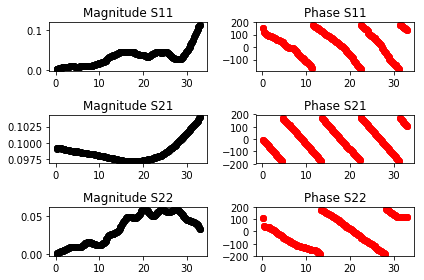

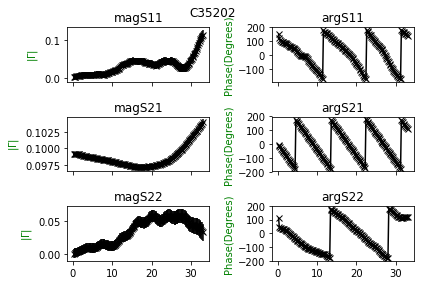

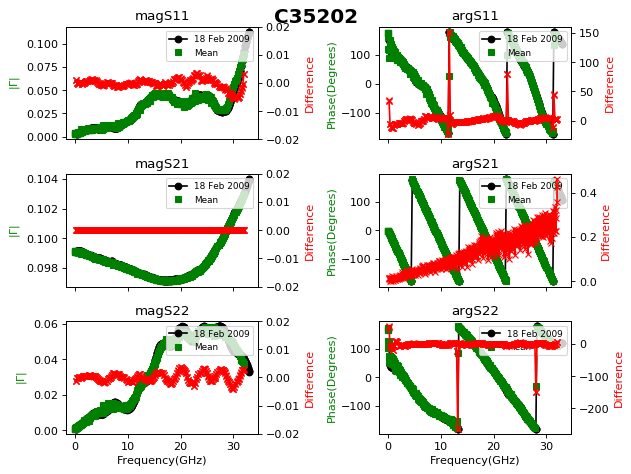

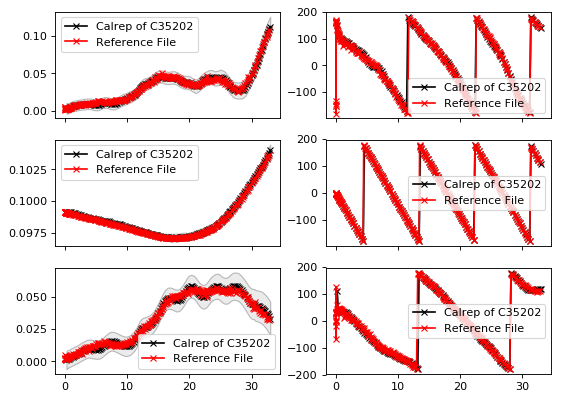

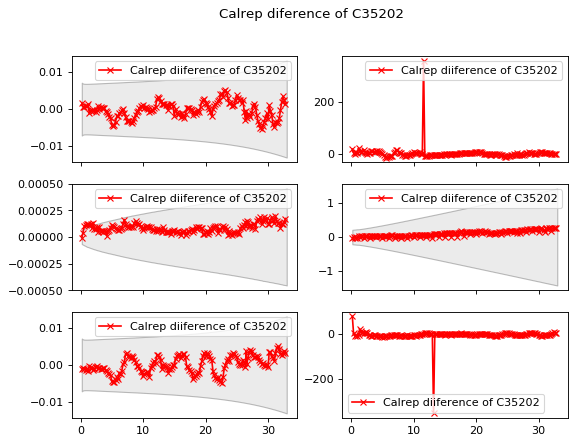

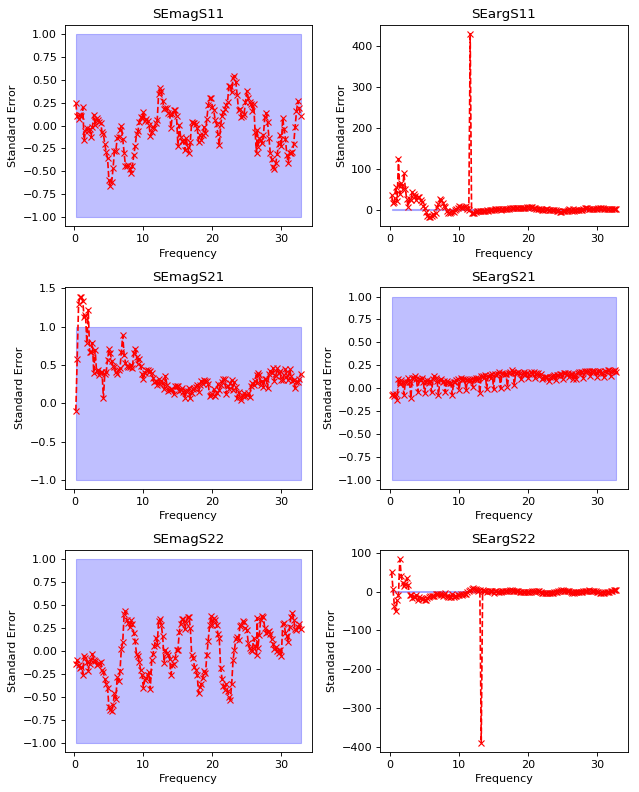

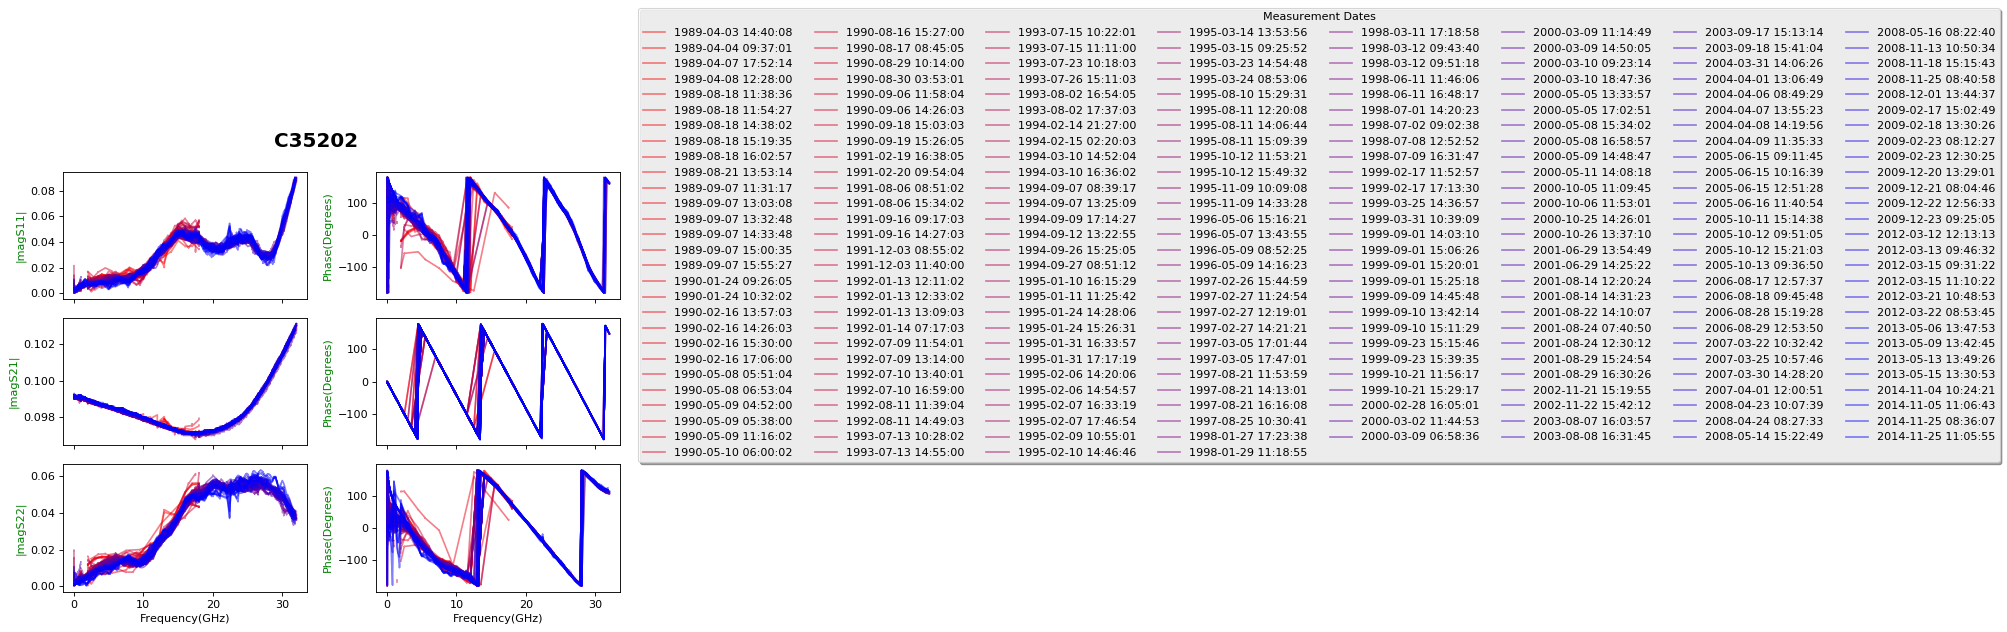

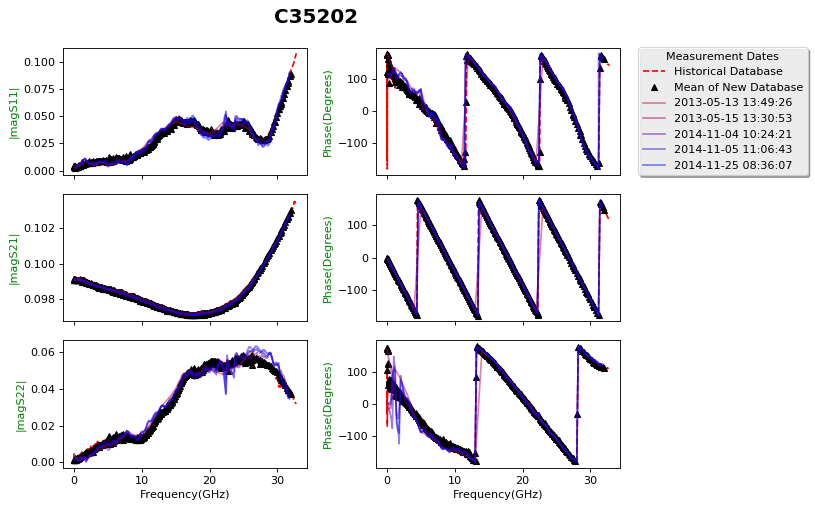

Body tag was not present adding it
Head tag was not present adding it
['edge_MatplotlibFigure_png_000', 'edge_png_base64_000', 'edge_base64_embeddedHTML_000']
moving MatplotlibFigure -> png
moving png -> base64
moving base64 -> embeddedHTML
['edge_MatplotlibFigure_png_000', 'edge_png_base64_000', 'edge_base64_embeddedHTML_000']
moving MatplotlibFigure -> png
moving png -> base64
moving base64 -> embeddedHTML
['edge_MatplotlibFigure_png_000', 'edge_png_base64_000', 'edge_base64_embeddedHTML_000']
moving MatplotlibFigure -> png
moving png -> base64
moving base64 -> embeddedHTML
['edge_MatplotlibFigure_png_000', 'edge_png_base64_000', 'edge_base64_embeddedHTML_000']
moving MatplotlibFigure -> png
moving png -> base64
moving base64 -> embeddedHTML
['edge_MatplotlibFigure_png_000', 'edge_png_base64_000', 'edge_base64_embeddedHTML_000']
moving MatplotlibFigure -> png
moving png -> base64
moving base64 -> embeddedHTML
['edge_MatplotlibFigure_png_000', 'edge_png_base64_000', 'edge_base64_embed

In [408]:
new_report.build_comparison_report(r"C:\Share\Ck_Std_raw_ascii\C35202.L32_021809")
new_report.show()

In [196]:
new_report.embedd_image(new_report.plots["raw_plot"])

['edge_MatplotlibFigure_png_000', 'edge_png_base64_000', 'edge_base64_embeddedHTML_000']
moving MatplotlibFigure -> png
moving png -> base64
moving base64 -> embeddedHTML
Body tag was not present adding it


In [365]:
new_report.show()

file://c:/users/sandersa/appdata/local/temp/1/tmpt0s3qf.html


In [202]:
new_report.options["Device_Id"]="CTN208"

In [203]:
new_report.build_checkstandard_report()

In [407]:
new_report.mean_frame

Frequency    magS11     argS11
0        0.010  0.999972  -0.431675
1        0.020  0.999956  -0.879803
2        0.030  0.999969  -1.316409
3        0.040  0.999974  -1.753977
4        0.050  0.999816  -2.217855
5        0.060  0.999887  -2.657622
6        0.070  0.999907  -3.100265
7        0.080  0.999961  -3.540417
8        0.090  0.999993  -3.980935
9        0.100  0.999989  -4.420707
10       0.150  0.999974  -6.599263
11       0.200  0.999918  -8.813886
12       0.250  0.999933 -10.994171
13       0.300  0.999998 -13.205664
14       0.350  1.000013 -15.385269
15       0.400  0.999990 -17.630751
16       0.450  0.999999 -19.784859
17       0.500  0.999974 -22.002743
18       0.550  0.999985 -24.180200
19       0.600  0.999931 -26.448874
20       0.650  0.999956 -28.585458
21       0.700  0.999994 -30.819216
22       0.750  0.999928 -32.983238
23       0.800  0.999915 -35.287063
24       0.850  0.999909 -37.399865
25       0.900  0.999943 -39.651000
26       0.950  0.999879 -41.814478
27       1.000  0.999928 -43.607125
28       0.025  0.999980  -1.126867
29       0.045  0.999961  -2.027500
..         ...       ...        ...
446     14.350  0.994799  67.497923
447     14.450  0.994781  62.908502
448     14.550  0.994744  58.320338
449     14.650  0.994774  53.723768
450     14.850  0.994863  44.529903
451     14.950  0.994832  39.931498
452     15.050  0.994828  35.327005
453     15.150  0.994737  30.721208
454     15.350  0.994786  21.491691
455     15.450  0.994801  16.873768
456     15.550  0.994836  12.253092
457     15.650  0.994826   7.637150
458     15.850  0.994901  -1.630628
459     15.950  0.995099  -6.257923
460     16.050  0.995082 -10.879324
461     16.150  0.994930 -15.512174
462     16.350  0.994901 -24.797729
463     16.450  0.994891 -29.440676
464     16.550  0.994911 -34.086570
465     16.650  0.994870 -38.735894
466     16.850  0.994890 -48.045362
467     16.950  0.994868 -52.705749
468     17.050  0.994873 -57.368261
469     17.150  0.994893 -62.034396
470     17.350  0.994853 -71.378261
471     17.450  0.994855 -76.056135
472     17.550  0.994839 -80.737150
473     17.650  0.994788 -85.420435
474     17.850  0.994760 -94.797150
475     17.950  0.994756 -99.485459

[476 rows x 3 columns]

In [257]:
print cn

['Frequency', 'magS11', 'argS11', 'magS21', 'argS21', 'magS22', 'argS22']


In [261]:
new_report.device_history["Device_Id"].unique().tolist()[0]

'C07202'

In [263]:
new_report.device_history["Measurement_Type"].unique()

array(['2-port'], dtype=object)

In [255]:
cn.remove("Direction")
cn.remove("Connect")

In [387]:

def plot_checkstandard_history(device_history,**options):
    """Creates a plot of all of the measurements of a device from a history frame (pandas.DataFrame). 
     """
    defaults={"display_legend":True,
              "save_plot":False,
              "directory":None,
              "specific_descriptor":"Checkstandard_History",
              "general_descriptor":"Plot",
              "file_name":None,
              "min_num":0,
              "max_num":None,
              "error_style":"area",
              "extra_plots":None,
              "extra_plot_labels":None,
              "extra_plot_formats":None}
    history_plot_options={}
    for key,value in defaults.iteritems():
        history_plot_options[key]=value
    for key,value in options.iteritems():
        history_plot_options[key]=value
    device_id=device_history["Device_Id"].unique().tolist()[0]
    measurement_type=device_history["Measurement_Type"].unique().tolist()[0]
    # The new method relies on metadata and not the class

    try:
        if re.search("1",measurement_type,re.IGNORECASE):
            model="OnePort"
        elif re.search("2",measurement_type,re.IGNORECASE):
            model="TwoPort"
        elif re.search('Dry Cal|Thermistor|power',measurement_type):
            model="Power"
    except:
        model=""


    #print("{0} is {1}".format("model",model))
    unique_measurement_dates=sorted(device_history["Measurement_Timestamp"].unique().tolist())
    number_dates=len(unique_measurement_dates[history_plot_options["min_num"]:history_plot_options["max_num"]])
    extra_length=0
    if history_plot_options['extra_plots']:
        extra_length=len(history_plot_options['extra_plots'])
    number_measurements=number_dates+extra_length
    #print("{0} are {1}".format("unique_measurement_dates",unique_measurement_dates))
    number_rows=0
    if re.search('Power',model):
        number_rows=2
        column_names=['magS11','argS11','Efficiency','Calibration_Factor']


    elif re.search('OnePort',model):
        number_rows=1
        column_names=['magS11','argS11']


    elif re.search('TwoPort',model):
        number_rows=3
        column_names=['magS11','argS11','magS21','argS21','magS22','argS22']
    

    fig, compare_axes = plt.subplots(nrows=number_rows, ncols=2, sharex='col',figsize=(8,6),dpi=80)
    for index, ax in enumerate(compare_axes.flat):

        #ax.xaxis.set_visible(False)
        if re.search('arg',column_names[index]):
            ax.set_ylabel('Phase(Degrees)',color='green')
        elif re.search('mag',column_names[index]):
            ax.set_ylabel(r'|{0}|'.format(column_names[index]),color='green')
        #ax.set_title(column_names[index])
        # initial plot of
        if history_plot_options["extra_plots"]:
            if history_plot_options["extra_plot_formats"]:
                plot_formats=history_plot_options["extra_plot_formats"]
            else:
                plot_formats=["r--" for plot in history_plot_options["extra_plots"]]
            if history_plot_options["extra_plot_labels"]:
                for model_index,model in enumerate(history_plot_options["extra_plots"]):
                    x=model["Frequency"]
                    y=model[column_names[index]]
                    ax.plot(x,y,plot_formats[model_index],label=history_plot_options["extra_plot_labels"][model_index])
            else:
                for model_index,model in enumerate(history_plot_options["extra_plots"]):
                    x=model["Frequency"]
                    y=model[column_names[index]]
                    ax.plot(x,y,plot_formats[model_index],label="Comparison {0}".format(model_index))
        


        for date_index,date in enumerate(unique_measurement_dates[history_plot_options["min_num"]:history_plot_options["max_num"]]):
            number_lines=len(unique_measurement_dates[history_plot_options["min_num"]:history_plot_options["max_num"]])
            date_device_history=device_history[device_history["Measurement_Timestamp"]==date]
            if not date_device_history.empty:
                x_date=date_device_history['Frequency']
                y_date=np.array(date_device_history[column_names[index]].tolist())
                date_color=(1-float(date_index+1)/number_lines,0,float(date_index+1)/number_lines,.5)
                ax.plot(x_date,y_date,
                    color=date_color,label=date)

        #ax.sharex(diff_axes[index])
        if history_plot_options["display_legend"]:
            if index==1:
                ax.legend(loc="center left", bbox_to_anchor=(1.05,.5),
                   ncol=int(max([round(float(number_measurements)/28.),1])), shadow=True, title="Measurement Dates", fancybox=True)
    compare_axes.flat[-2].set_xlabel('Frequency(GHz)',color='k')
    compare_axes.flat[-1].set_xlabel('Frequency(GHz)',color='k')
    fig.subplots_adjust(hspace=0)
    plt.tight_layout()
    fig.suptitle(device_id+"\n",fontsize=18,fontweight='bold', y=1.05,)
    # Dealing with the save option
    if history_plot_options["file_name"] is None:
        file_name=auto_name(specific_descriptor=history_plot_options["specific_descriptor"],
                            general_descriptor=history_plot_options["general_descriptor"],
                            directory=history_plot_options["directory"],extension='png',padding=3)
    else:
        file_name=history_plot_options["file_name"]
    if history_plot_options["save_plot"]:
        #print file_name
        plt.savefig(os.path.join(history_plot_options["directory"],file_name))
    else:
        plt.show()
    return fig

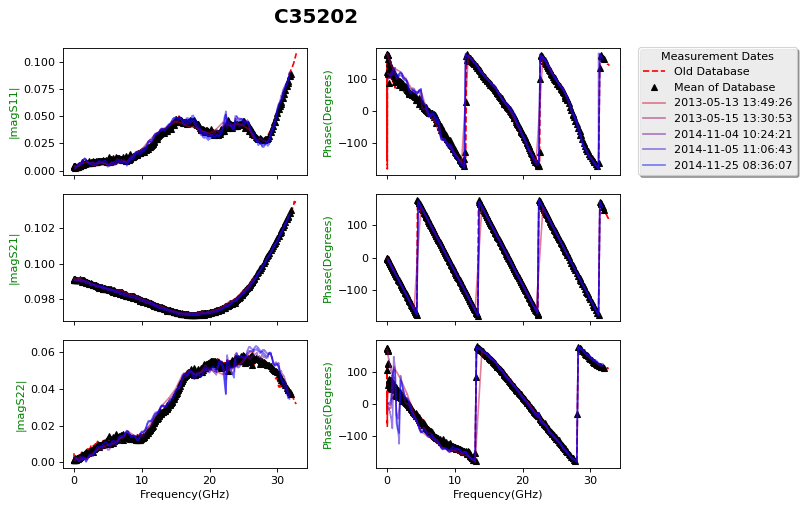

In [388]:
fig=plot_checkstandard_history(new_report.device_history,min_num=len(new_report.get_measurement_dates())-6,
                              max_num=len(new_report.get_measurement_dates())-1,extra_plots=[new_report.results_file,
                                                                                             new_report.mean_frame],
                              extra_plot_labels=["Old Database","Mean of Database"],extra_plot_formats=["r--","k^"])

In [307]:
new_report.outlier_removal()

In [281]:
fig.legend(loc="upper left", bbox_to_anchor=[0, 1],
           ncol=2, shadow=True, title="Legend", fancybox=True)

TypeError: legend() takes at least 3 arguments (1 given)

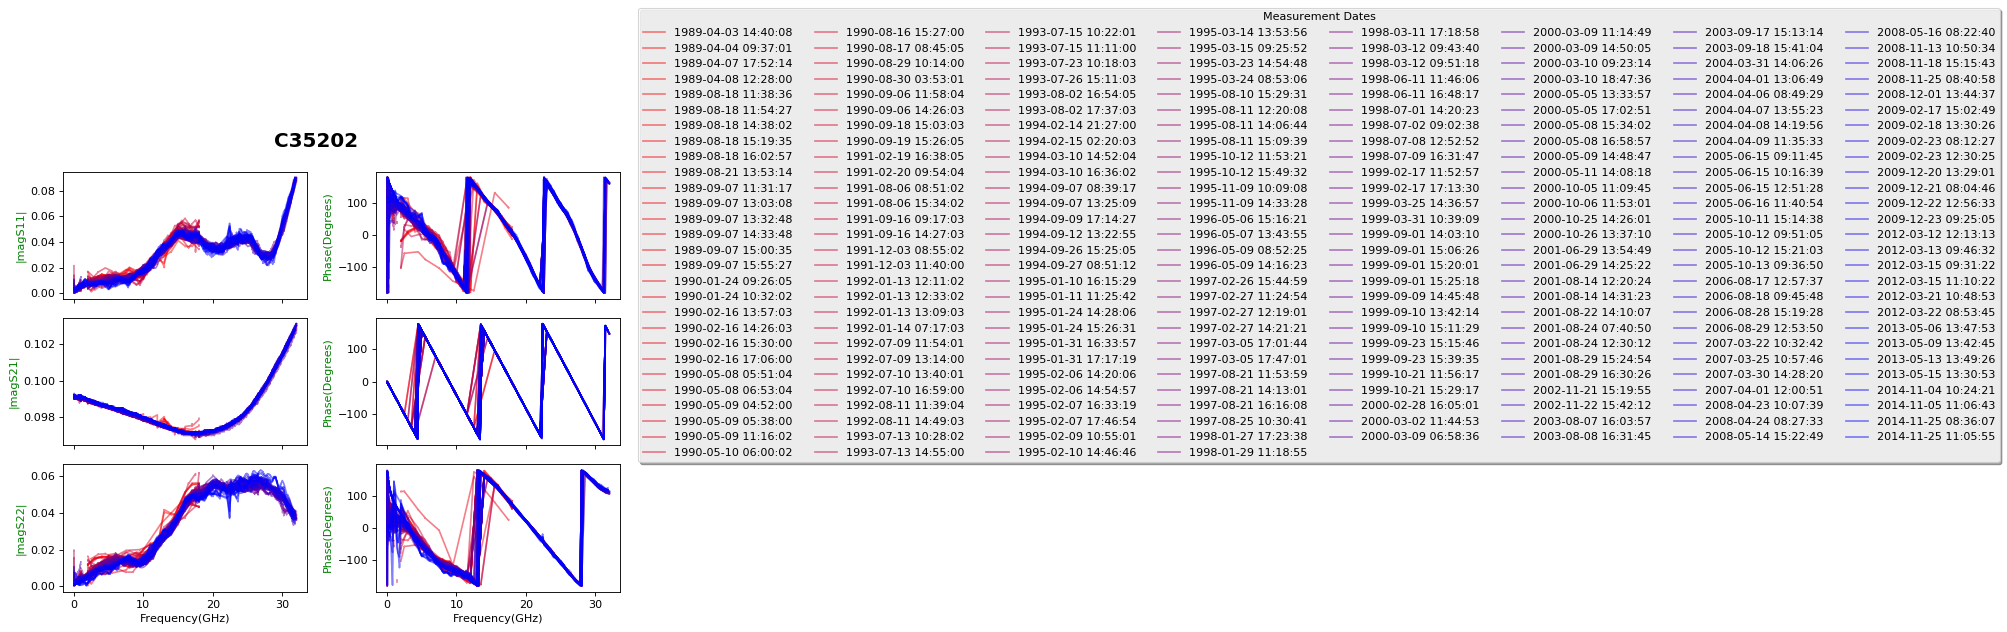

In [389]:
fig=plot_checkstandard_history(new_report.device_history)

In [342]:
new_report.raw_measurement.metadata

{'Calibration_Date': '',
 'Calibration_Name': '',
 'Connector_Type_Calibration': '',
 'Connector_Type_Measurement': '7',
 'Device_Description': '20 DB CK STD',
 'Device_Id': 'C07202',
 'Measurement_Date': '28 Apr 2000',
 'Measurement_Time': '15:43:16',
 'Measurement_Type': '2-port',
 'Nbs': '4',
 'Number_Connects': '3',
 'Number_Frequencies': '86',
 'Number_Repeats': '1',
 'Operator': 'AFM',
 'Port_Used': '2',
 'Program_Revision': '981016.1',
 'Program_Used': '8536D',
 'Start_Frequency': '7',
 'System_Id': 'HP8510',
 'System_Letter': 'L'}

In [394]:
new_report.standard_error.get_conformation_dictionary()

{'Frequency': True,
 'SEargS11': False,
 'SEargS21': True,
 'SEargS22': False,
 'SEmagS11': True,
 'SEmagS21': True,
 'SEmagS22': True}

In [402]:
new_report.to_pdf(r"c:\Share\Tes.pdf")


Loading pages (1/6)
Counting pages (2/6)                                               
Resolving links (4/6)                                                       
Loading headers and footers (5/6)                                           
Printing pages (6/6)
Done                                                                      


'c:\\Share\\Tes.pdf'

[4.7140452079103295e-06, 4.7140452079103295e-06, 8.164965809277104e-06, 1.6996731711976052e-05, 1.8856180831641318e-05, 2.624669291337244e-05, 2.8284271247461973e-05, 2.62466929133727e-05, 3.091206165165255e-05, 2.6246692913372848e-05, 2.8284271247462383e-05, 2.3570226039551442e-05, 2.8284271247462383e-05, 1.8856180831640498e-05, 1.4142135623731192e-05, 1.6996731711976052e-05, 1.4142135623731192e-05, 2.49443825784927e-05, 2.054804667656317e-05, 2.4944382578492697e-05, 1.699673171197582e-05, 1.4142135623730373e-05, 1.6329931618554564e-05, 2.1602468994693326e-05, 1.6996731711975652e-05, 2.160246899469279e-05, 1.6996731711976052e-05, 2.624669291337325e-05, 3.559026084010373e-05, 3.3993463423951873e-05, 4.642796092394733e-05, 6.018490028422565e-05, 6.34209919681352e-05, 6.34209919681352e-05, 6.798692684790398e-05, 7.25718035235908e-05, 7.118052168020909e-05, 7.408703590297615e-05, 7.408703590297615e-05, 7.133644853010884e-05, 7.483314773547871e-05, 6.944222218666555e-05, 6.944222218666553e

In [429]:
def TableGraph_to_Links(table_graph, **options):
    """Converts a table graph to a set of download links with embedded data in them"""
    defaults = {"base_name": None,
                "nodes": ['XmlFile', 'CsvFile', 'ExcelFile', 'OdsFile', 'MatFile', 'HtmlFile', 'JsonFile'],
                "extensions": ['xml', 'csv', 'xlsx', 'ods', 'mat', 'html', 'json'],
                "mime_types": ['application/xml', 'text/plain',
                               'application/vnd.openxmlformats-officedocument.spreadsheetml.sheet',
                               'application/vnd.oasis.opendocument.spreadsheet',
                               'application/x-matlab-data', 'text/html', 'application/json']}
    conversion_options = {}
    for key, value in defaults.iteritems():
        conversion_options[key] = value
    for key, value in options.iteritems():
        conversion_options[key] = value
    if conversion_options["base_name"] is None:
        base_name = 'test.txt'
    else:
        base_name = conversion_options["base_name"]

    nodes = conversion_options["nodes"]
    extensions = conversion_options["extensions"]
    mime_types = conversion_options["mime_types"]

    out_links = ""
    for node_index, node in enumerate(nodes):
        table_graph.move_to_node(node)
        file_path = table_graph.data
        in_file = open(file_path, 'rb')
        content_string = in_file.read()
        link = String_to_DownloadLink(content_string,
                                      suggested_name=change_extension(base_name, extensions[node_index]),
                                      mime_type=mime_types[node_index],
                                      text=change_extension(base_name, extensions[node_index]))
        if node_index == len(nodes) - 1:
            out_links = out_links + link
        else:
            out_links = out_links + link + " | "
    return out_links

In [472]:
def plot_calrep_uncertainty(calrep_model,**options):
    """Plots the uncertainty values for a calrep model versus frequency"""
    defaults = {"display_legend": True,
                "save_plot": False,
                "directory": None,
                "specific_descriptor": "Calrep_Uncertainty",
                "general_descriptor": "Plot",
                "file_name": None,
                "error_suffixes":['b','a','d','g'] ,
                "error_names":['Type B','SNIST','Connect','Total Uncertainty'],
                "error_plot_formats": ['r-x','b-x','g-x','k-x']}
    comparison_plot_options = {}
    for key, value in defaults.iteritems():
        comparison_plot_options[key] = value
    for key, value in options.iteritems():
        comparison_plot_options[key] = value
    # figure out the number of plots based on the measurement type
    measurement_type = calrep_model.metadata["Measurement_Type"]
    if re.search('1|one', measurement_type, re.IGNORECASE):
        number_plots = 2
        column_names = ['magS11', 'argS11']
    elif re.search('2|two', measurement_type, re.IGNORECASE):
        if re.search('NR', measurement_type, re.IGNORECASE):
            number_plots = 8
            column_names = ['magS11', 'argS11', 'magS12', 'argS12', 'magS21', 'argS21', 'magS22', 'argS22']
        else:
            number_plots = 6
            column_names = ['magS11', 'argS11', 'magS21', 'argS21', 'magS22', 'argS22']
    else:
        number_plots = 3
        column_names = ['magS11', 'argS11', 'Efficiency']
    # create the error column names
    error_columns = []
    for column in column_names[:]:
        error_columns_per_plot=[]
        for suffix in comparison_plot_options["error_suffixes"]:
            error_column = column.replace("mag", "uM" +suffix )
            error_column = error_column.replace("arg", "uA" + suffix)
            error_column = error_column.replace("Efficiency", "uE" +suffix)
            error_columns_per_plot.append(error_column)
        error_columns.append(error_columns_per_plot)

    # We want plots that have frequency as the x-axis and y that has an error
    calrep_x = calrep_model["Frequency"]
    number_rows = int(round(float(number_plots) / 2))
    fig, compare_axes = plt.subplots(nrows=number_rows, ncols=2, sharex='col', figsize=(8, 6), dpi=80)
    # each axis has an error column
    for plot_index, ax in enumerate(compare_axes.flat[:]):
        for error_index,error_column in enumerate(error_columns[plot_index]):

            error = np.array(calrep_model[error_column])
            ax.plot(calrep_x, error, comparison_plot_options['error_plot_formats'][error_index],
                    label='{0}'.format(comparison_plot_options['error_names'][error_index]))
            ax.set_title(column_names[plot_index])

        if comparison_plot_options["display_legend"]:
            ax.legend()

    # Dealing with the save option
    if comparison_plot_options["file_name"] is None:
        file_name = auto_name(specific_descriptor=comparison_plot_options["specific_descriptor"],
                              general_descriptor=comparison_plot_options["general_descriptor"],
                              directory=comparison_plot_options["directory"]
                              , extension='png', padding=3)
    else:
        file_name = comparison_plot_options["file_name"]
    if comparison_plot_options["save_plot"]:
        # print file_name
        plt.savefig(os.path.join(comparison_plot_options["directory"], file_name))
    else:
        plt.show()
    return fig

In [453]:
new_report.calrep_measurement.column_names


['Frequency',
 'magS11',
 'uMbS11',
 'uMaS11',
 'uMdS11',
 'uMgS11',
 'argS11',
 'uAbS11',
 'uAaS11',
 'uAdS11',
 'uAgS11']

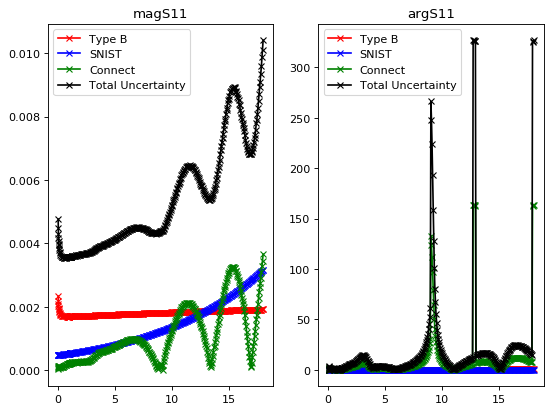

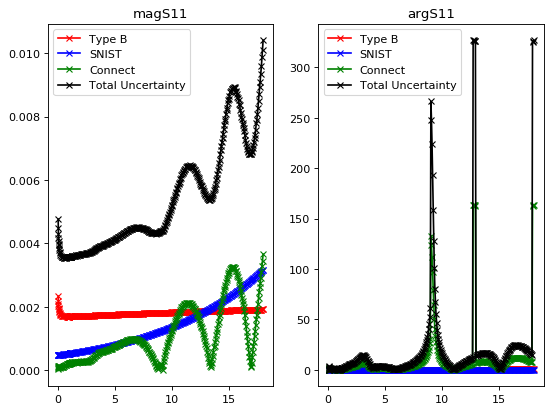

In [473]:
plot_calrep_uncertainty(new_report.calrep_measurement)

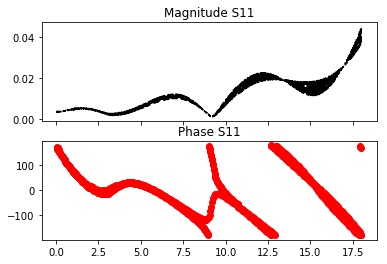

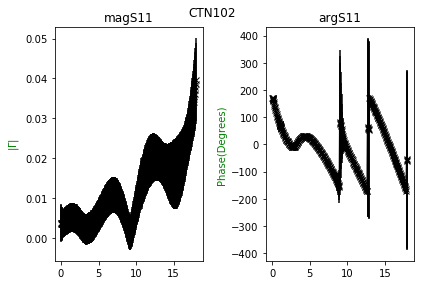

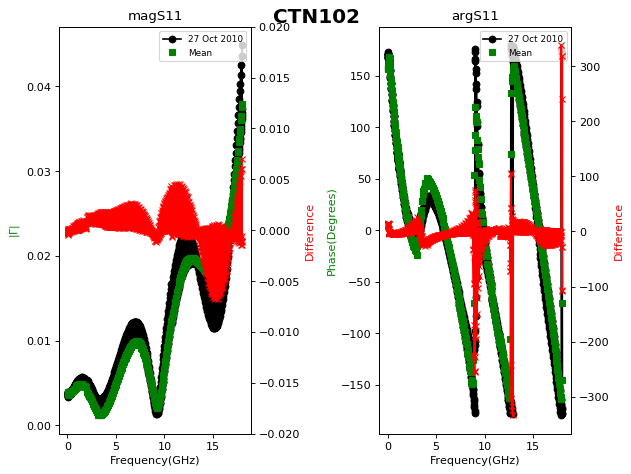

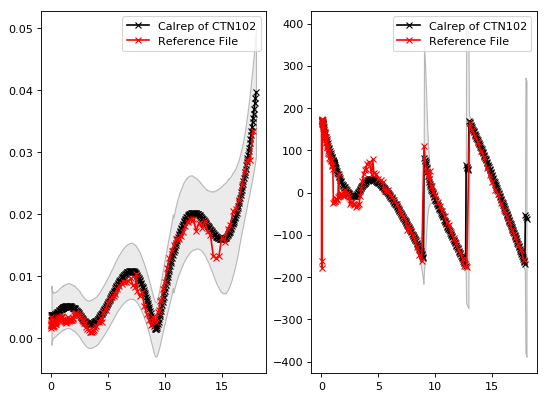

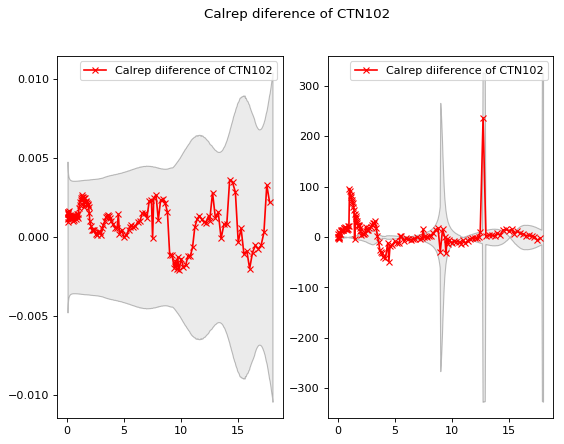

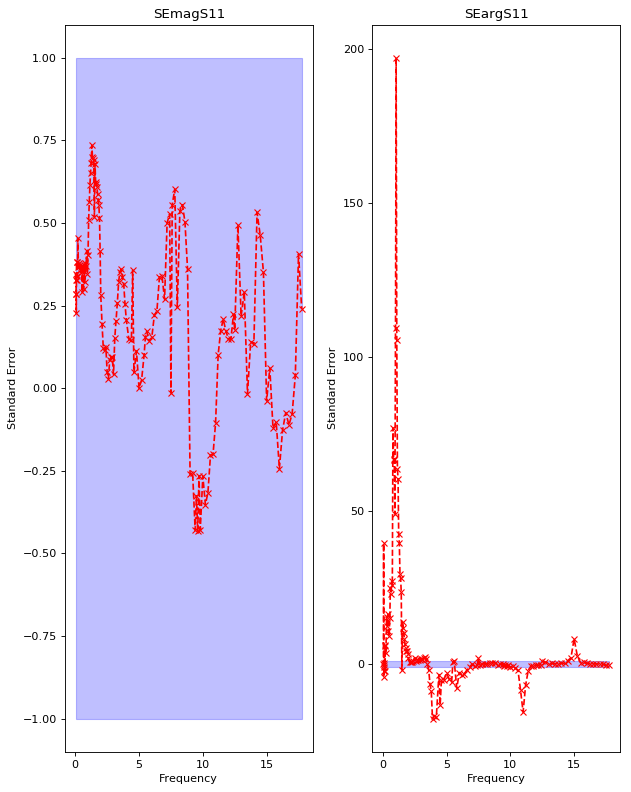

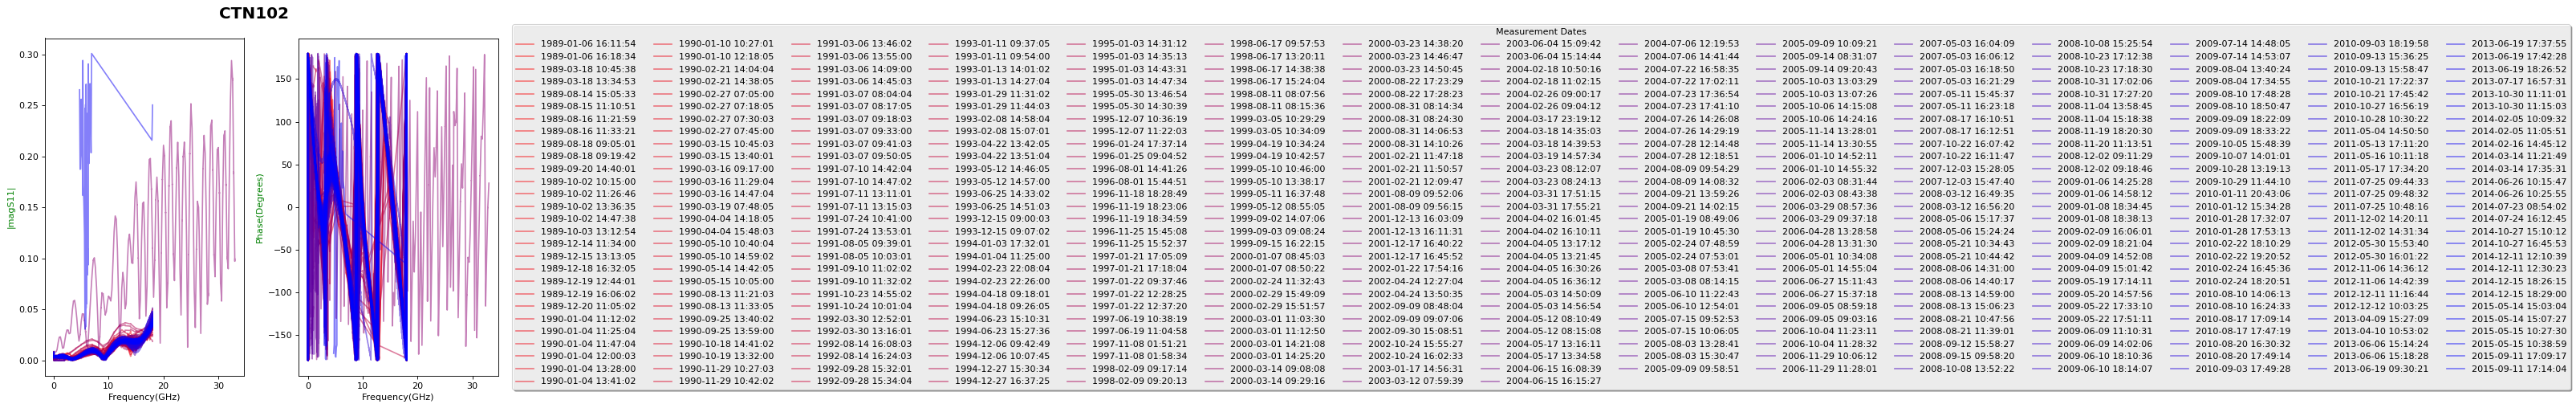

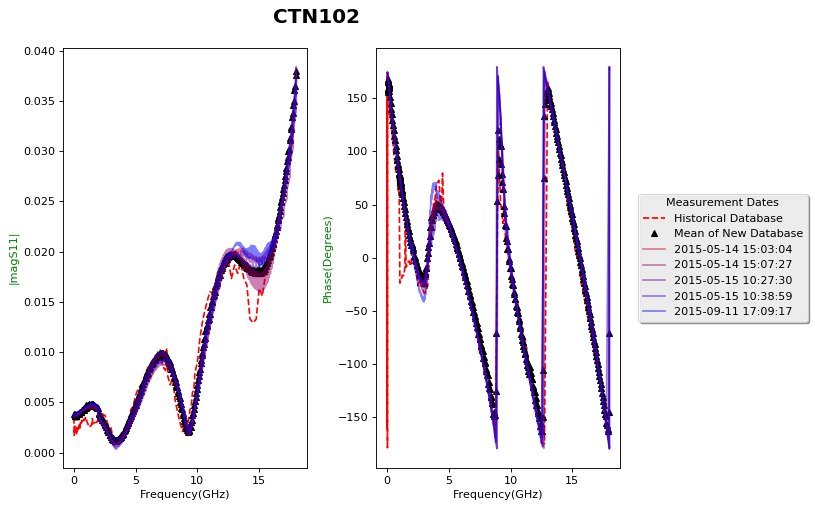

Body tag was not present adding it
Head tag was not present adding it
index is 0
['edge_AsciiDataTable_DataFrame_000', 'edge_DataFrame_CsvFile_000']
moving AsciiDataTable -> DataFrame
moving DataFrame -> CsvFile
['edge_CsvFile_DataFrame_000', 'edge_DataFrame_ExcelFile_000']
moving CsvFile -> DataFrame
moving DataFrame -> ExcelFile
index is 1
['edge_AsciiDataTable_DataFrame_000', 'edge_DataFrame_CsvFile_000']
moving AsciiDataTable -> DataFrame
moving DataFrame -> CsvFile
['edge_CsvFile_DataFrame_000', 'edge_DataFrame_ExcelFile_000']
moving CsvFile -> DataFrame
moving DataFrame -> ExcelFile
index is 2
['edge_AsciiDataTable_DataFrame_000', 'edge_DataFrame_CsvFile_000']
moving AsciiDataTable -> DataFrame
moving DataFrame -> CsvFile
['edge_CsvFile_DataFrame_000', 'edge_DataFrame_ExcelFile_000']
moving CsvFile -> DataFrame
moving DataFrame -> ExcelFile
['edge_DataFrame_AsciiDataTable_000']
moving DataFrame -> AsciiDataTable
index is 3
['edge_AsciiDataTable_DataFrame_000', 'edge_DataFrame_Csv

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:26: DtypeWarning: Columns (7,16) have mixed types. Specify dtype option on import or set low_memory=False.


moving DataFrame -> ExcelFile
['edge_MatplotlibFigure_png_000', 'edge_png_base64_000', 'edge_base64_embeddedHTML_000']
moving MatplotlibFigure -> png
moving png -> base64
moving base64 -> embeddedHTML
['edge_MatplotlibFigure_png_000', 'edge_png_base64_000', 'edge_base64_embeddedHTML_000']
moving MatplotlibFigure -> png
moving png -> base64
moving base64 -> embeddedHTML
['edge_MatplotlibFigure_png_000', 'edge_png_base64_000', 'edge_base64_embeddedHTML_000']
moving MatplotlibFigure -> png
moving png -> base64
moving base64 -> embeddedHTML
['edge_MatplotlibFigure_png_000', 'edge_png_base64_000', 'edge_base64_embeddedHTML_000']
moving MatplotlibFigure -> png
moving png -> base64
moving base64 -> embeddedHTML
['edge_MatplotlibFigure_png_000', 'edge_png_base64_000', 'edge_base64_embeddedHTML_000']
moving MatplotlibFigure -> png
moving png -> base64
moving base64 -> embeddedHTML
['edge_MatplotlibFigure_png_000', 'edge_png_base64_000', 'edge_base64_embeddedHTML_000']
moving MatplotlibFigure ->

In [465]:
new_report.build_comparison_report(r"C:\Share\Ck_Std_raw_ascii\CTN102.R46_102710")

NameError: global name 'columnn_names' is not defined

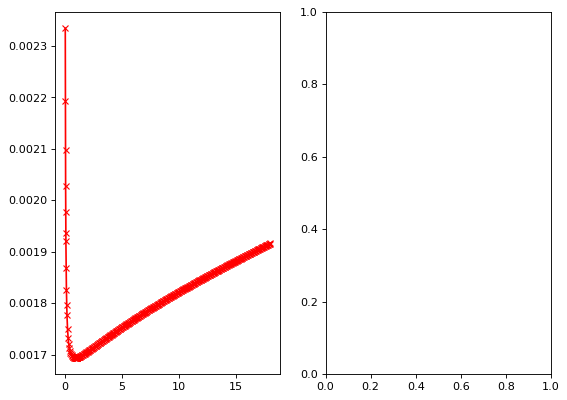

In [469]:
plot_calrep_uncertainty(new_report.calrep_measurement)

In [474]:
new_report.show()

file://c:/users/sandersa/appdata/local/temp/1/tmpqgns9o.html


In [476]:
new_report.save(auto_name(directory=r'C:\Share\Example Check Standard Reports',
                         specific_descriptor="{0}".format(new_report.calrep_measurement.metadata["Device_Id"]),
                          general_descriptor="Checkstandard_Report",extension="html"))

'CTN102_Checkstandard_Report_20180130_001.html'